Author: Cansu Tezcan Fernandez Gutierrez

In [1]:
!pip install --upgrade openpyxl
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# model selection

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
!pip install xgboost
from xgboost import XGBClassifier
from scipy.stats import chi2_contingency
from sklearn.calibration import CalibratedClassifierCV

# pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
!pip install --upgrade imbalanced-learn
from imblearn.over_sampling import SMOTE
import sklearn
import imblearn



# evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from xgboost import plot_importance
!pip install shap
import shap
from sklearn.metrics import f1_score



# data viz
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip show openpyxl

Name: openpyxl
Version: 3.1.5
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: C:\Users\cnste\AppData\Roaming\Python\Python311\site-packages
Requires: et-xmlfile
Required-by: 
Note: you may need to restart the kernel to use updated packages.


# <font color= darkred> Importing the dataset </font>

In [3]:
# Load the file
df = pd.read_excel(r'C:\Users\cnste\Downloads\Telco_customer_churn.xlsx\Telco_customer_churn.xlsx', engine='openpyxl')

In [4]:
# Inspect the data 
df = pd.DataFrame(df)

#shows all the columns

pd.set_option('display.max_columns', None)

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


#  <font color= darkred> Data Inspection</font>

In [5]:
# Inspect the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
# checking dimentions of the data set
df.shape

(7043, 33)

In [7]:
# summing up the missing values (column-wise)
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [8]:
# missing percentage 
(df.isnull().sum() / len(df) * 100).round(2)

CustomerID            0.00
Count                 0.00
Country               0.00
State                 0.00
City                  0.00
Zip Code              0.00
Lat Long              0.00
Latitude              0.00
Longitude             0.00
Gender                0.00
Senior Citizen        0.00
Partner               0.00
Dependents            0.00
Tenure Months         0.00
Phone Service         0.00
Multiple Lines        0.00
Internet Service      0.00
Online Security       0.00
Online Backup         0.00
Device Protection     0.00
Tech Support          0.00
Streaming TV          0.00
Streaming Movies      0.00
Contract              0.00
Paperless Billing     0.00
Payment Method        0.00
Monthly Charges       0.00
Total Charges         0.00
Churn Label           0.00
Churn Value           0.00
Churn Score           0.00
CLTV                  0.00
Churn Reason         73.46
dtype: float64

In [9]:
#checking for distinct values
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [10]:
# checking for duplicates
df.duplicated().sum()

0

In [11]:
print(df.isna().sum().sum())

5174


In [12]:
# Remove leading/trailing whitespace from all column names
df.columns = df.columns.str.strip()

In [13]:
# Remove leading/trailing whitespace from all cells and covert empty ones to nan
def is_missing(val):
    return pd.isna(val) or str(val).strip().lower() in ['', 'nan']

for col in df.columns:
    df[col] = df[col].map(lambda val: np.nan if is_missing(val) else str(val).strip() if isinstance(val, str) else val)



In [14]:
print(df.isna().sum())

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [15]:
# Inspecting the column 
df['Total Charges'].dtype

dtype('float64')

In [16]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [18]:
print(df['Total Charges'].isna().sum())

11


In [19]:
df['Total Charges'].dtype

dtype('float64')

In [20]:
df_c = df.copy()

#   <font color= darkred> EDA </font>

### Univariate Analysis

In [21]:
# Understanding the target column and class distribution
counts = df['Churn Value'].value_counts()
percentages = df['Churn Value'].value_counts(normalize=True) * 100

# Combine into one DataFrame
pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage'])

,Count,Percentage
Churn Value,,
0,5174,73.463013
1,1869,26.536987


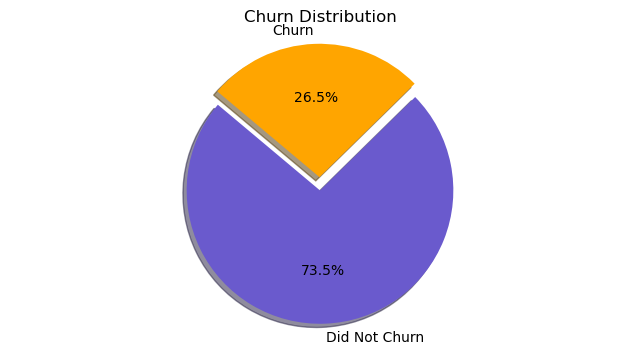

In [22]:
# visualize target variable class distribution

# Get value counts
labels = ['Did Not Churn', 'Churn']
sizes = df['Churn Value'].value_counts().sort_index()
colors = ['#6A5ACD', '#FFA500']  
explode = (0, 0.1)

plt.figure(figsize=(8, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True)
plt.title('Churn Distribution')  #Colorblind-Friendly 
plt.axis('equal')
plt.show()

In [23]:
# check summary statistic numerical columns 
df.describe().round(2)

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.00,7043.00,7043.00,7043.00,7043.00,7032.00,7043.00,7043.00,7043.00
mean,1.0,93521.96,36.28,-119.80,32.37,64.76,2283.30,0.27,58.70,4400.30
std,0.0,1865.79,2.46,2.16,24.56,30.09,2266.77,0.44,21.53,1183.06
min,1.0,90001.00,32.56,-124.30,0.00,18.25,18.80,0.00,5.00,2003.00
25%,1.0,92102.00,34.03,-121.82,9.00,35.50,401.45,0.00,40.00,3469.00
50%,1.0,93552.00,36.39,-119.73,29.00,70.35,1397.48,0.00,61.00,4527.00
75%,1.0,95351.00,38.22,-118.04,55.00,89.85,3794.74,1.00,75.00,5380.50
max,1.0,96161.00,41.96,-114.19,72.00,118.75,8684.80,1.00,100.00,6500.00


The dataset provides valuable insights into customer behaviour and financial engagement with the company.

The Tenure Months column reveals that customers range from newly joined (0 months) to loyal users with up to 6 years of service (72 months). The distribution is slightly right-skewed but generally normal, with 25% of customers having been with the company for less than a year, while 75% have stayed for nearly six years. This indicates a healthy mix of new and long-term customers, suggesting both growth and retention potential.

The Monthly Charges vary from €18.25 to €118.75, with a median of €70.35. The data is slightly right-skewed, showing that while some customers pay minimal fees, a significant portion are mid-to-high spenders. This spread suggests opportunities for upselling and tiered service offerings.

 Similarly, Total Charges, which represent cumulative spending, range widely from €18.80 to €8,684.80 and are highly right-skewed. The median total charge is €1,397.48, and the top quartile reaches over €2,283. This reflects a strong correlation between tenure and spending, reinforcing the importance of retaining long-term customers.

The Churn Value indicates whether a customer has left (1) or stayed (0), and while the distribution is slightly skewed, churn is not overwhelmingly high. 

However, the Churn Score, a predictive metric ranging from 0 to 100. Half of the customers have churn scores above 61, indicating a substantial portion are at elevated risk. Additionally, 25% of customers score above 75, representing the highest-risk segment.This calls for deeper investigation into churn drivers, especially among high-value customers.

Finally, Customer Lifetime Value (CLTV), which estimates future revenue potential, ranges from €2,003.00 to €6,500.00, with a median of €4,527.00. The distribution is slightly left-skewed, indicating that many customers have substantial long-term value. These high-value individuals should be closely monitored, especially if they also exhibit high churn scores.

In [24]:
# check summary statistic categorical columns 
df.describe(include='object')

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869
unique,7043,1,1,1129,1652,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,20
top,3668-QPYBK,United States,California,Los Angeles,"33.964131, -118.272783",Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,Attitude of support person
freq,1,7043,7043,305,5,3555,5901,3641,5416,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174,192


 • City: The majority of customers are located in Los Angeles, which may indicate a regional concentration of services or marketing efforts.
 
 • Gender: The dataset is nearly evenly split, Male customers make up 50.48%, while Female customers account for 49.52%, a difference of just 67 records. This balance suggests no gender bias in customer acquisition.
 
• Senior Citizen: 83% of customers are under 65, meaning most are not senior citizens. This could influence product design, tech support needs, and marketing tone.


• Partner: 52% of customers have no partner, indicating a majority of single individuals. This may correlate with service preferences (e.g., fewer bundled family plans)

• Dependents : 76% of customers have no dependents, children, parents, or others.

• Phone Service: A dominant 90% of customers have phone service, showing it's a core offering.

• Multiple Lines: 48% do not have multiple lines, and the column has 3 distinct values (Yes, No, No phone service). This split suggests potential for upselling multi-line plans.

• Internet Service: 43% use Fiber optic, with 3 distinct values (DSL, Fiber optic, No). Fiber users may be more tech-savvy or high-value customers.
• Online Security & Backup: 
 ○ Online Security: Roughly 50% use it, indicating a balanced adoption.
 ○ Online Backup & Device Protection: Around 44% do not use either, suggesting room to promote these add-ons.
 
• Tech Support: 49% lack tech support, which could be a churn risk if issues arise.

• Streaming Services: 40% do not use streaming TV or movies, which may reflect either low interest or limited bundling.

• Contract Type: 55% are on month-to-month contracts, which is a churn risk. These customers are more likely to leave without long-term commitment.

• Paperless Billing: 59% use paperless billing, indicating digital adoption and potential cost savings.

• Payment Method: 34% use Electronic check, the most common among 4 distinct methods. Understanding payment preferences can help tailor promotions or reduce friction.

• Churn Rate: 27% of customers have churned, which is significant and warrants attention.

• Churn Reason: The most frequent reason is “Attitude of support person”, suggesting that customer service quality is a major driver of attrition. However, 73% of this column is missing, limiting the reliability of this insight. Improving data collection here could unlock powerful retention strategies.


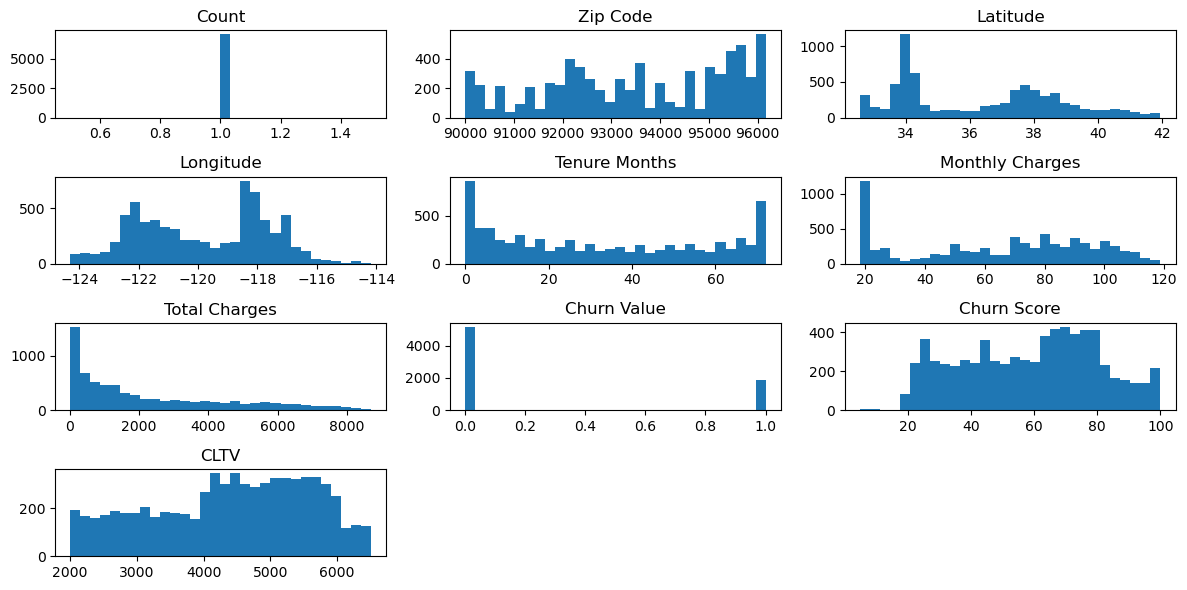

In [25]:
# Check data distribution
df.hist(bins=30, figsize=(12, 6), grid=False)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

The Zip Code distribution is clearly multimodal, with several distinct peaks. This suggests that customers are concentrated in specific geographic areas, likely reflecting regional service hubs or targeted marketing zones. The high variance and spread indicate the company serves a wide range of locations, but with clusters of high customer density in certain zip codes. This insight can guide location-based promotions or resource allocation.

The Tenure Months histogram shows a bimodal distribution, with two prominent peaks, one near zero and another toward the higher end. This pattern reflects two major customer segments: newly joined customers (likely in their first month) and loyal long-term users. Despite the bimodality, the overall shape is fairly normal, suggesting a healthy mix of customer lifecycles. 

The Monthly Charges distribution has a strong peak on the lower end, indicating a right-skewed distribution. This means most customers pay lower monthly fees, likely reflecting basic service usage or entry-level plans. The tail on the right suggests a smaller group of high-paying customers who may be using premium services. 

The Total Charges histogram is highly right-skewed, with most values concentrated below €2,000. This reflects the cumulative nature of charges, new customers naturally have lower totals, while long-term users accumulate more over time. The skew reinforces the importance of customer retention, as long-term customers contribute significantly more revenue.

The Churn Value column shows a binary distribution, with the majority of customers in the “not churned” class. This is a positive sign, indicating strong customer retention.

The Churn Score distribution is approximately normal, with a concentration of values between 60 and 80. This suggests that a large portion of customers are at moderate to high risk of churn. 

The CLTV distribution is also approximately normal, with most values concentrated between €4,000 and €6,000. This indicates a strong average customer value, and the bell-shaped curve suggests consistent revenue potential across the customer base.

In [26]:
num_cols = df.select_dtypes(['float','int64']).columns.tolist()
num_cols

['Count',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Value',
 'Churn Score',
 'CLTV']

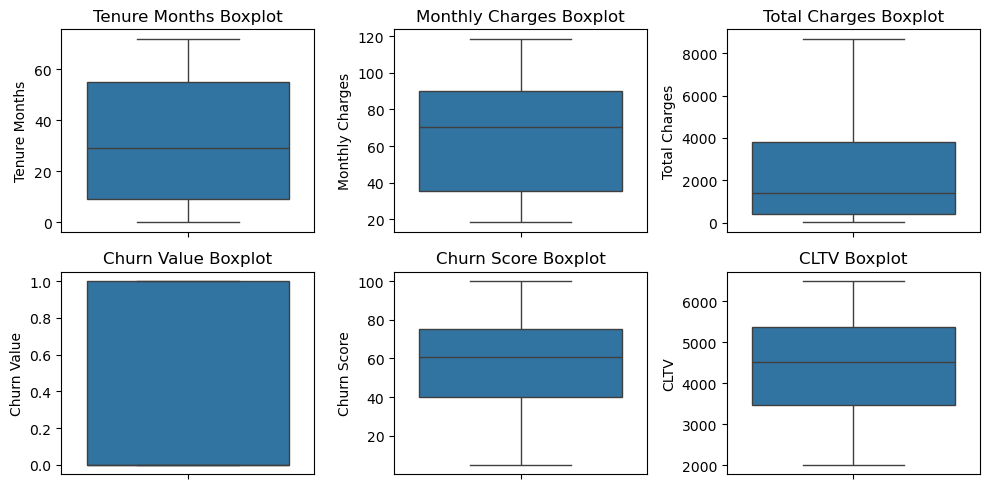

In [27]:
# check for outliers (exculing count, zip code,Latitude and Longitude)

numeric_columns = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']  

plt.figure(figsize=(10, 5))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df[col])
    plt.title(f'{col} Boxplot')
    plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()

plt.show()

The dataset shows a generally well-behaved distribution across most variables, with no extreme outliers, which is good for modelling.

 Tenure Months displays a symmetrical boxplot with a centred median and balanced whiskers, suggesting a fairly normal distribution. This indicates that customers are evenly spread across different tenure durations.
 
 Similarly, Churn Score and Customer Lifetime Value (CLTV) both exhibit centred boxes and balanced whiskers, with no outliers, reinforcing the presence of normal distributions. Most customers have CLTV values between €4,000 and €6,000, which provides a stable foundation for modelling customer value.
 
In contrast, Monthly Charges and Total Charges show signs of right-skewed distributions. The boxplot for Monthly Charges is compressed with long whiskers, indicating that while most customers pay lower fees, a few pay significantly more. 

Total Charges also has a low box and a long right-side whisker, reflecting that most customers accumulate lower charges, but some long-term users have very high totals. These skewed distributions suggest the presence of a small group of high-value customers, which could be important for segmentation or targeting strategies.

Finally, Churn Value is a binary variable (0 or 1), so its boxplot appears as a vertical line with no spread or outliers, this is expected for categorical data and doesn’t offer much insight in boxplot form.


In [28]:
cat_cols = df.select_dtypes("object").columns.tolist()
cat_cols

['CustomerID',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label',
 'Churn Reason']

--- Analysis for Phone Service (Categorical-like) ---
Value Counts:
 Phone Service
Yes    6361
No      682
Name: count, dtype: int64

Proportions:
 Phone Service
Yes    0.9032
No     0.0968
Name: proportion, dtype: float64


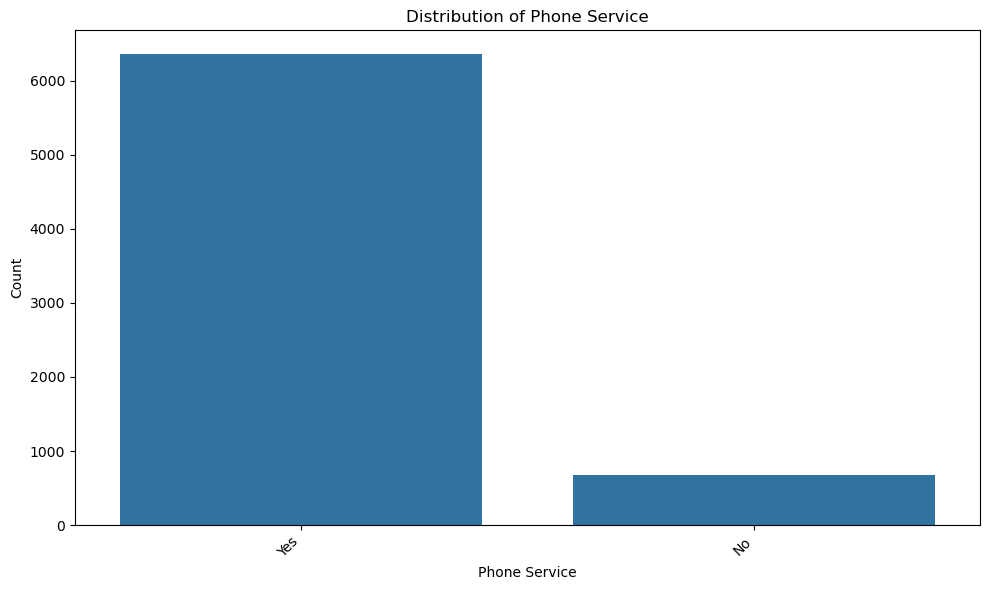

--- Analysis for Multiple Lines (Categorical-like) ---
Value Counts:
 Multiple Lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Proportions:
 Multiple Lines
No                  0.4813
Yes                 0.4218
No phone service    0.0968
Name: proportion, dtype: float64


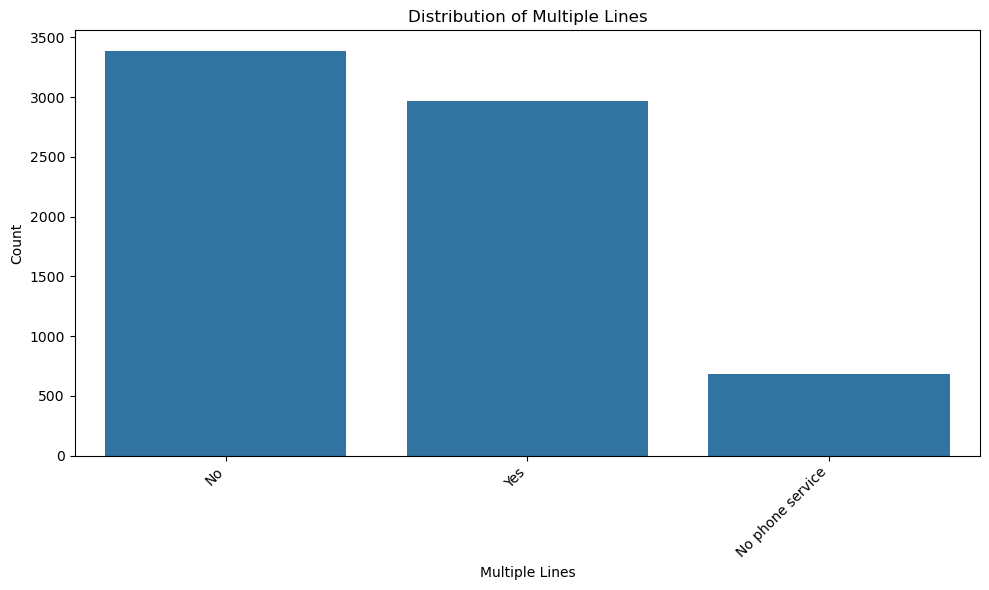

--- Analysis for Internet Service (Categorical-like) ---
Value Counts:
 Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Proportions:
 Internet Service
Fiber optic    0.4396
DSL            0.3437
No             0.2167
Name: proportion, dtype: float64


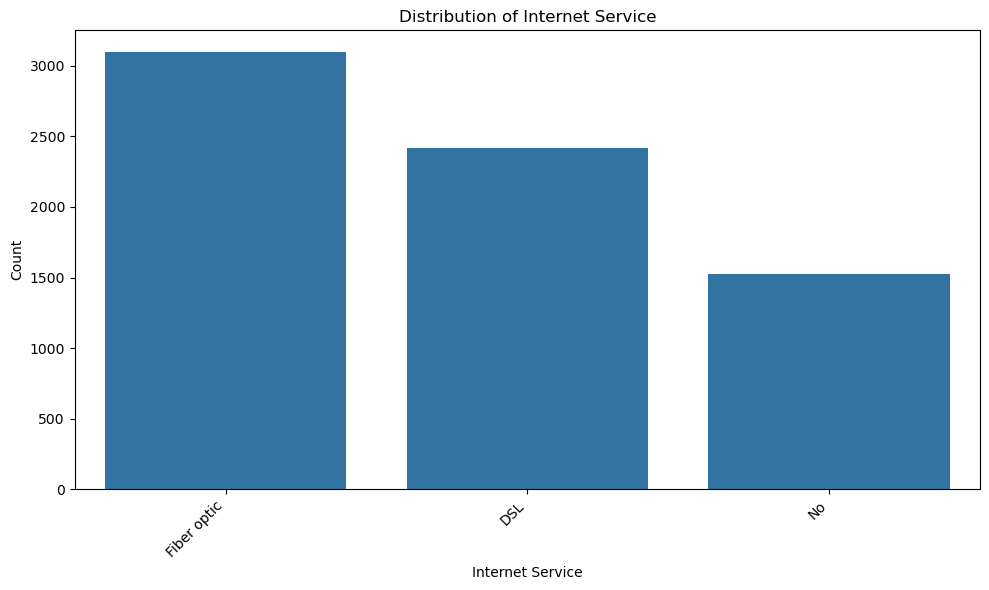

--- Analysis for Online Security (Categorical-like) ---
Value Counts:
 Online Security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Proportions:
 Online Security
No                     0.4967
Yes                    0.2867
No internet service    0.2167
Name: proportion, dtype: float64


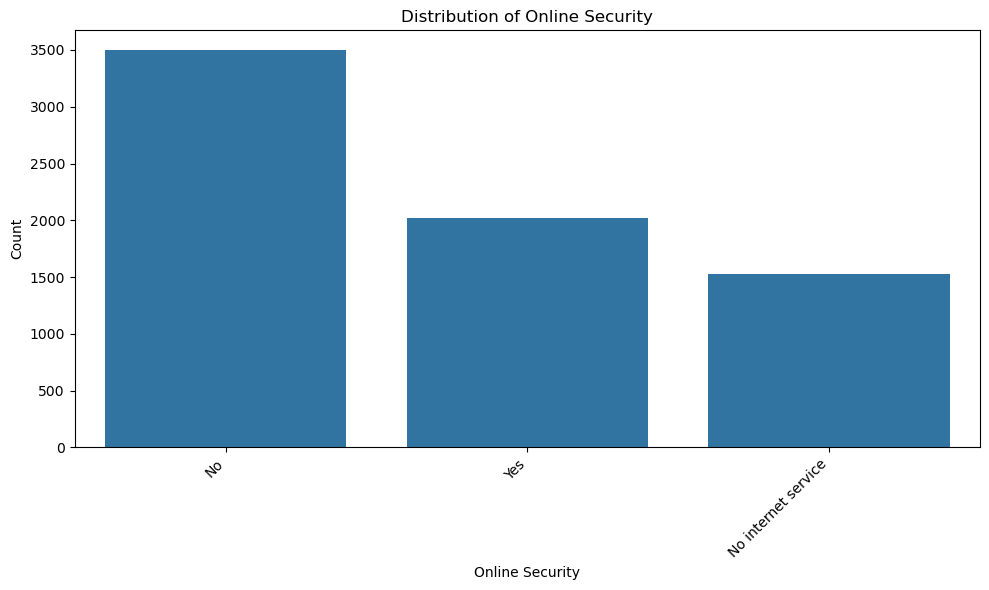

--- Analysis for Online Backup (Categorical-like) ---
Value Counts:
 Online Backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Proportions:
 Online Backup
No                     0.4384
Yes                    0.3449
No internet service    0.2167
Name: proportion, dtype: float64


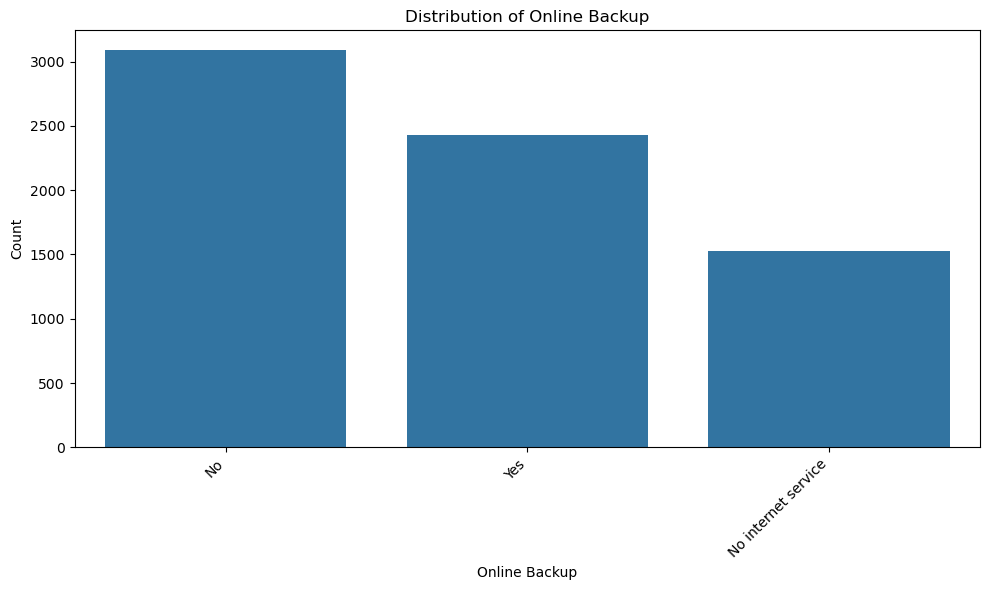

--- Analysis for Device Protection (Categorical-like) ---
Value Counts:
 Device Protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

Proportions:
 Device Protection
No                     0.4394
Yes                    0.3439
No internet service    0.2167
Name: proportion, dtype: float64


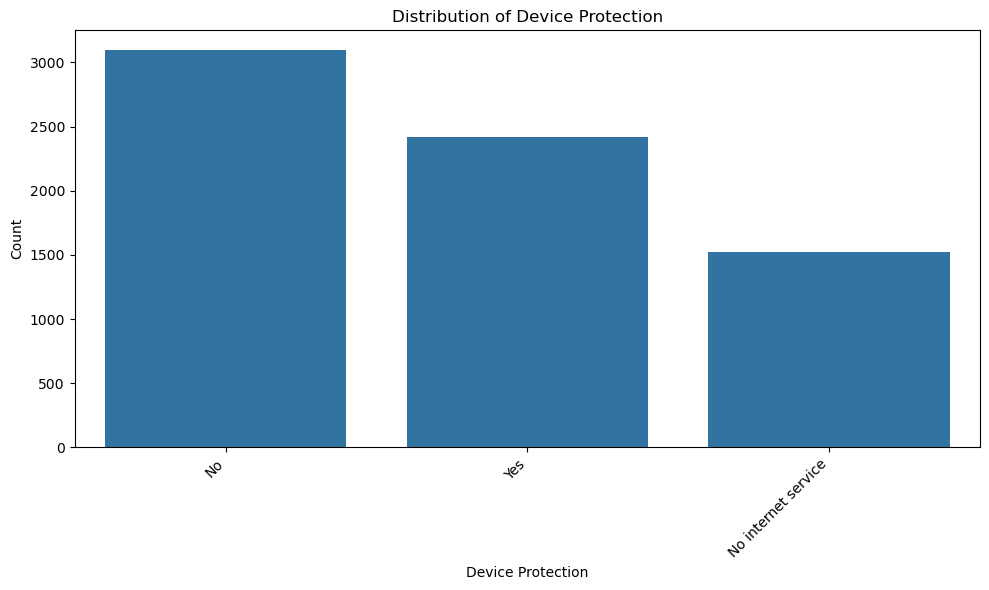

--- Analysis for Tech Support (Categorical-like) ---
Value Counts:
 Tech Support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

Proportions:
 Tech Support
No                     0.4931
Yes                    0.2902
No internet service    0.2167
Name: proportion, dtype: float64


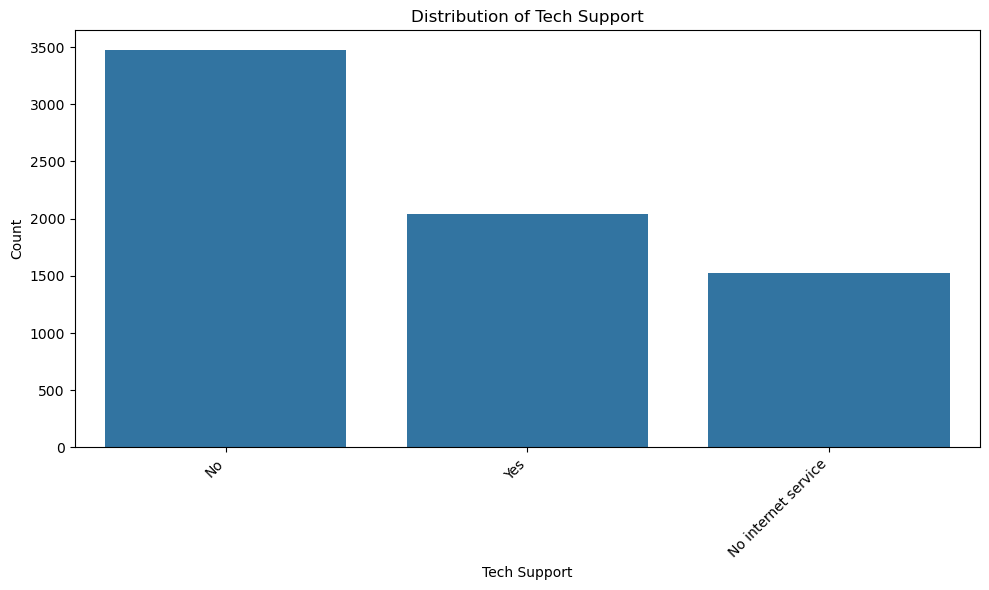

--- Analysis for Streaming TV (Categorical-like) ---
Value Counts:
 Streaming TV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

Proportions:
 Streaming TV
No                     0.3990
Yes                    0.3844
No internet service    0.2167
Name: proportion, dtype: float64


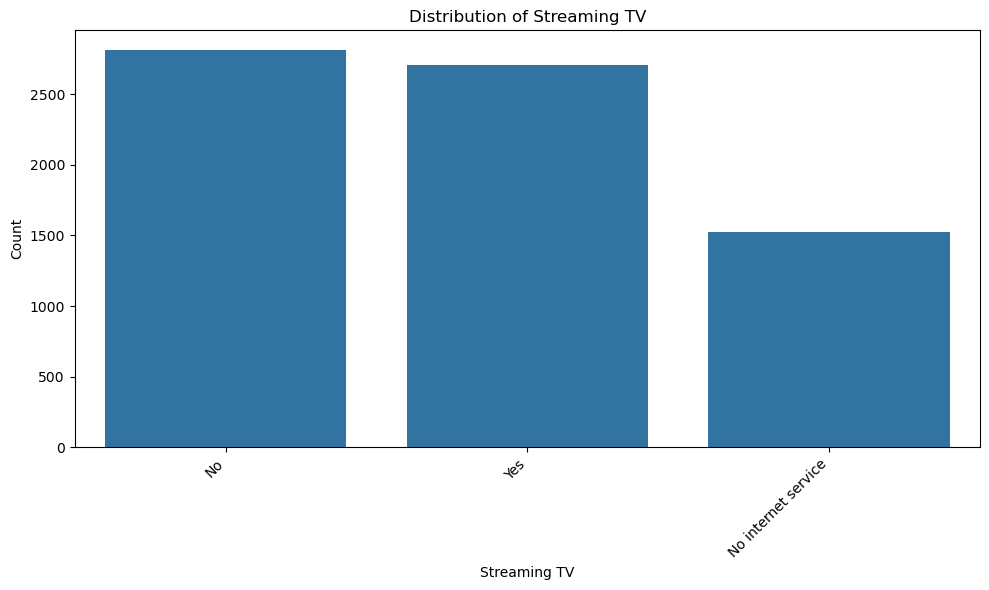

--- Analysis for Streaming Movies (Categorical-like) ---
Value Counts:
 Streaming Movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

Proportions:
 Streaming Movies
No                     0.3954
Yes                    0.3879
No internet service    0.2167
Name: proportion, dtype: float64


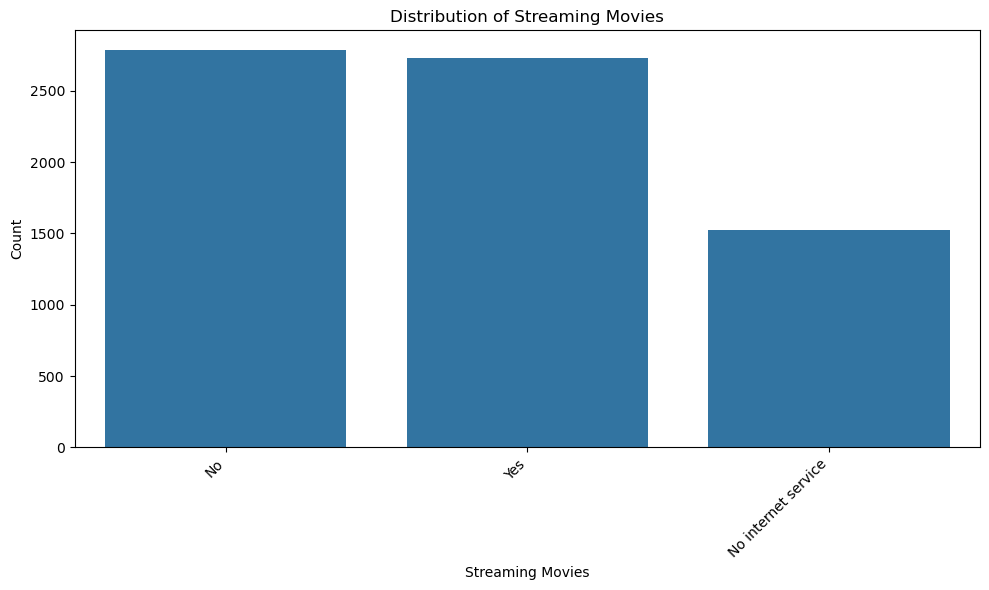

In [29]:
# Inspect the data - Univariate EDA

service_cols = [
    'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
    'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies'
]
# for categorical-like data
for col in service_cols:
    if df[col].nunique() < 50:
        print(f"--- Analysis for {col} (Categorical-like) ---")
        print("Value Counts:\n", df[col].value_counts(dropna=False))
        print("\nProportions:\n", df[col].value_counts(normalize=True, dropna=False).round(4))
        
        # Countplot for categorical data
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    else:
        print(f"--- Analysis for {col} (Numerical) ---")
        # For numerical data
        print("Summary Statistics:\n", df[col].describe())
        
        # Histogram for numerical data
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=50)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

 Phone Service
• Distribution
– Yes: 6361 customers ≈ (90%)
– No: 682 customers ≈ (10%)

90% of customers subscribe to Phone Service, making it a core product.
The 10% without Phone Service likely have different needs. Perhaps “data-only” or mobile-only usage. We can leverage this data for deeper analysis to craft targeted offers and retention campaigns.

Multiple Lines
• Distribution
– No : 3390 customers  ≈ (48%)
– Yes : 2971 customers ≈  (42%)
– No phone service : 682 customers ≈(10%)

Nearly half of the customers (48%) have only one line, while 42% maintain multiple lines, suggesting robust multi-line adoption. There might be Cross-Sell and Upsell Opportunities.

Internet Service
• Distribution
– Optic Fiber : 3096 customers ≈ (44%)
– DLS : 2421 customers ≈ (34%)
– No internet service :  1526 customers ≈ (22%)

78%  percent of our customers subscribe to an internet service. Among those, Fiber Optic is the clear favourite, outpacing DSL by about 10%  points. The remaining 22 percent haven’t adopted internet service at all, many might rely solely on phone service instead.
To unlock upsell opportunities, we should dive into demographic and usage data to understand why this segment hasn’t gone online and how we might convert them into higher-value subscribers. At the same time, Fiber Optic customers who pay more and expect top-tier performance, are more likely to shop around for better deals, so proactively monitoring and enhancing service quality will be key to keeping them satisfied.

 Online Security
• Distribution
– No :  3498 customers ≈(50%)
– Yes  :  2019 customers ≈ (29%)
– No internet service :  1526 customers ≈ (22%)

Only 29% of all customers subscribe to the online-security add-on, while 50% of customers with internet service actively decline it and the remaining 22% don’t have internet service at all. In fact, of the 5517 internet users, just 2019 (37%) pay for online security, leaving a sizeable 3498 (63%) addressable segment for upsell campaigns.

 Online Backup
• Distribution
– No :  3088 customers ≈ (50%)
– Yes  :  2429 customers ≈ (29%)
– No internet service :  1526 customers ≈  (22%)

Only 29% of all customers subscribe to the online-backup add-on. Half of those with internet access (50%) actively decline the service, and 22% don’t have internet at all. That means 71% of your total base aren’t using online backup, an audience ripe for targeted upsell.
By crafting bespoke bundle offers (for example, combining backup with security or device protection) and deploying tailored promotions, you can convert a meaningful slice of these non-subscribers, boosting both adoption and revenue.

 Device Protection
• Distribution
– No :    3095 customers  ≈ (44%)
– Yes  :   2422 customers ≈ (34%)
– No internet service :  1526 customers ≈ (22%)

Only 34% of all customers subscribe to the device-protection add-on, while 44% of internet users actively decline it and 22% have no internet service at all. In other words, two-thirds of your total base are unprotected, either by choice or by lack of connectivity, highlighting a substantial upsell and retention opportunity.

Tech Support
• Distribution
– No :    3473 customers  ≈ (49%)
– Yes  :   2044 customers ≈ (29%)
– No internet service :  1526 customers ≈ (22%)

While nearly a third of customers subscribe to Tech Support, almost half of internet users actively decline the add-on, and about a fifth are without internet service entirely. This highlights an opportunity to enhance marketing, reconsider bundling strategies, and invest in educational outreach to improve perceived value and adoption among current subscribers.

 Streaming TV
• Distribution
– No :     2810 customers  ≈ (40%)
– Yes  :   2707 customers ≈ (38%)
– No internet service :  1526 customers ≈  (22%)

Just 38% of customers elect to subscribe to the Streaming TV add-on, while 40% of internet users explicitly decline the offering, and 22% do not utilize internet services. These figures can highlight a clear segmentation in customer behaviour and present opportunities for targeted engagement.

Streaming Movies
• Distribution
– No :     2785 customers  ≈  (40%)
– Yes  :   2732 customers ≈ (39%)
– No internet service :  1526 customers ≈ (22%)

The Streaming Movies add-on shows a relatively balanced adoption pattern, with 39% of customers subscribing, 40% declining, and 22% lacking internet access. This distribution suggests a mature product with room for strategic optimization.

Summary

An analysis of customer service adoption reveals strong engagement with core offerings , 90% subscribe to Phone Service and 78% use internet services, with Fiber Optic leading over DSL. However, add-on services show mixed uptake: only 29–39% of customers subscribe to options like Online Security, Backup, Device Protection, Tech Support, and Streaming content, while a significant portion actively decline them or lack internet access altogether. Nearly half of customers use only one phone line, suggesting room for multi-line upselling. These patterns highlight clear segmentation and untapped potential across the base. Strategic opportunities include bundling complementary services, targeting non-internet users with conversion offers, enhancing retention for high-value segments, and using educational outreach to boost perceived value and adoption.


--- Analysis for Country (Categorical) ---
Value Counts:
 Country
United States    7043
Name: count, dtype: int64

Proportions:
 Country
United States    1.0
Name: proportion, dtype: float64


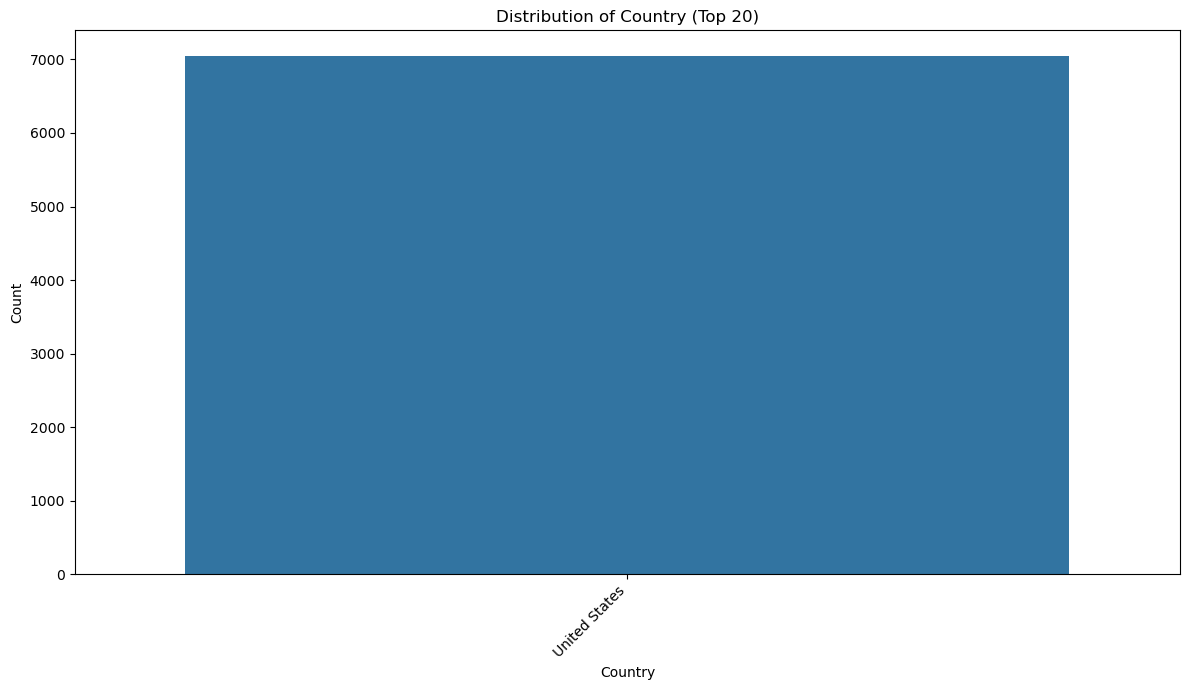

--- Analysis for State (Categorical) ---
Value Counts:
 State
California    7043
Name: count, dtype: int64

Proportions:
 State
California    1.0
Name: proportion, dtype: float64


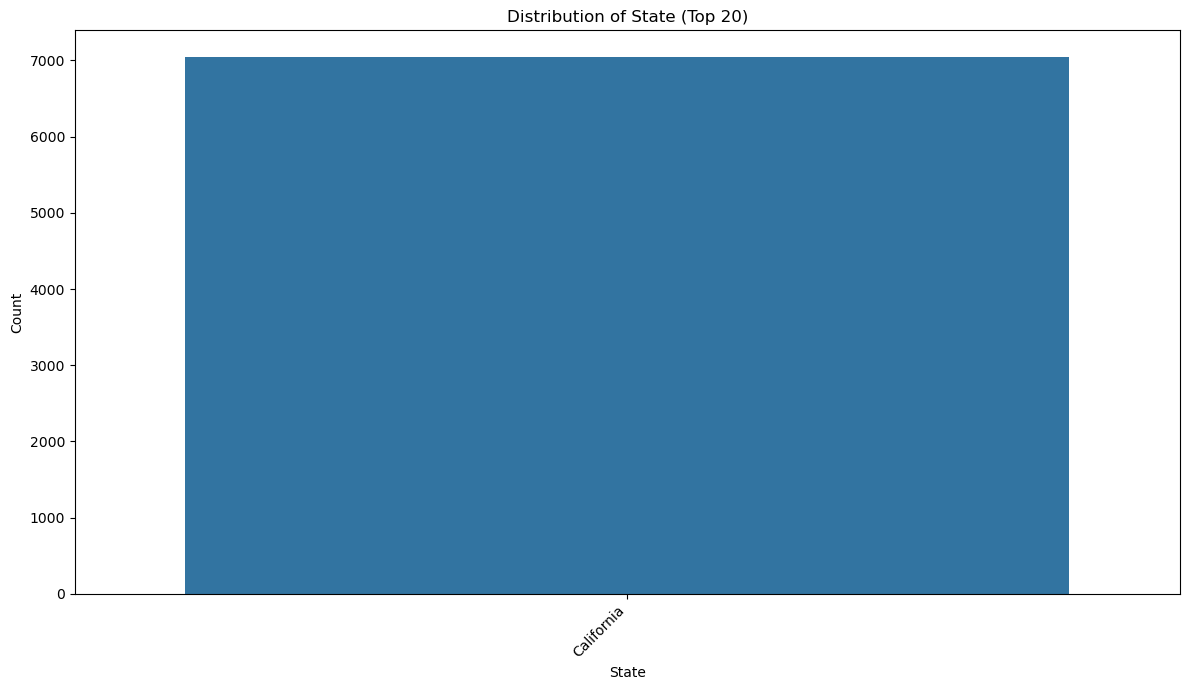

--- Analysis for City (Categorical) ---
Value Counts:
 City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

Proportions:
 City
Los Angeles       0.0433
San Diego         0.0213
San Jose          0.0159
Sacramento        0.0153
San Francisco     0.0148
                   ...  
Healdsburg        0.0006
Jenner            0.0006
Philo             0.0006
Point Arena       0.0006
Olympic Valley    0.0006
Name: proportion, Length: 1129, dtype: float64


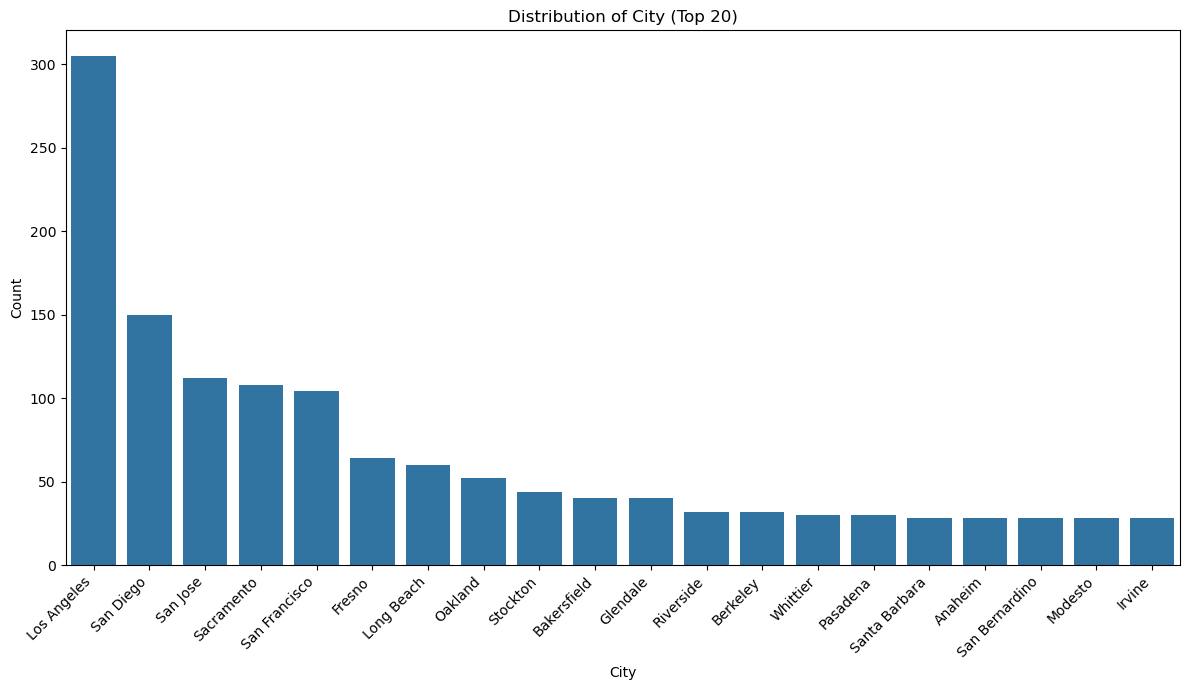

--- Analysis for Zip Code (Categorical) ---
Value Counts:
 Zip Code
90003    5
91436    5
91916    5
91913    5
91911    5
        ..
95303    4
95251    4
95250    4
95246    4
96146    4
Name: count, Length: 1652, dtype: int64

Proportions:
 Zip Code
90003    0.0007
91436    0.0007
91916    0.0007
91913    0.0007
91911    0.0007
          ...  
95303    0.0006
95251    0.0006
95250    0.0006
95246    0.0006
96146    0.0006
Name: proportion, Length: 1652, dtype: float64


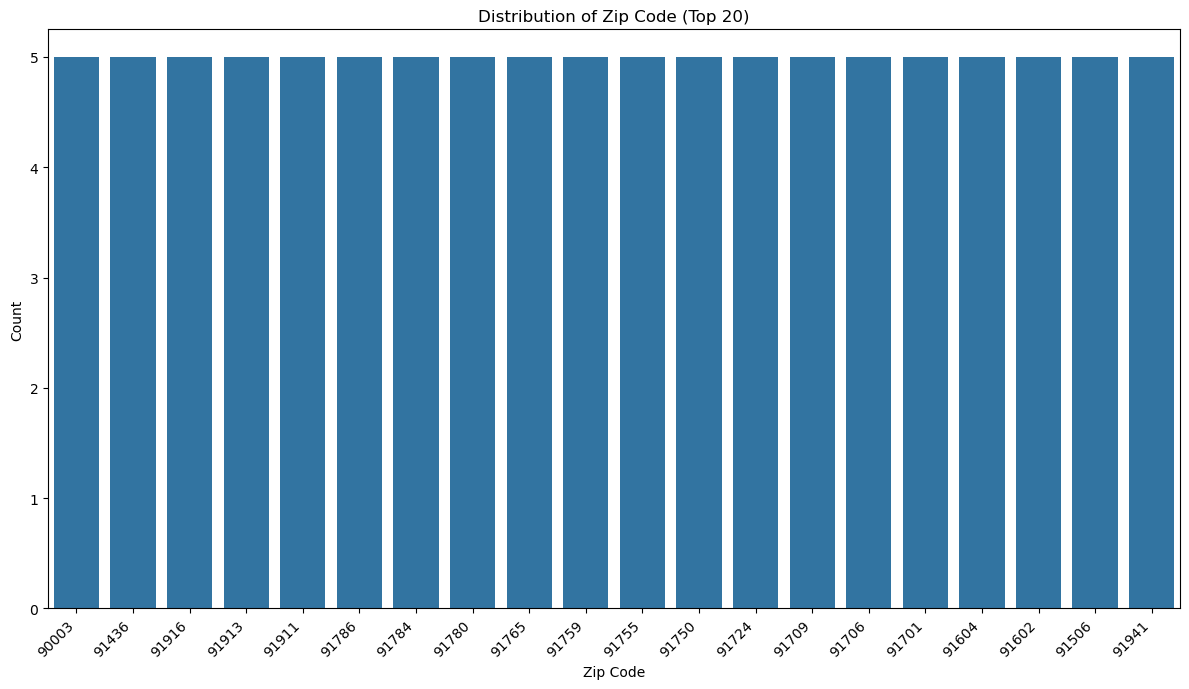

--- Analysis for Latitude (Numerical) ---
Summary Statistics:
 count    7043.000000
mean       36.282441
std         2.455723
min        32.555828
25%        34.030915
50%        36.391777
75%        38.224869
max        41.962127
Name: Latitude, dtype: float64


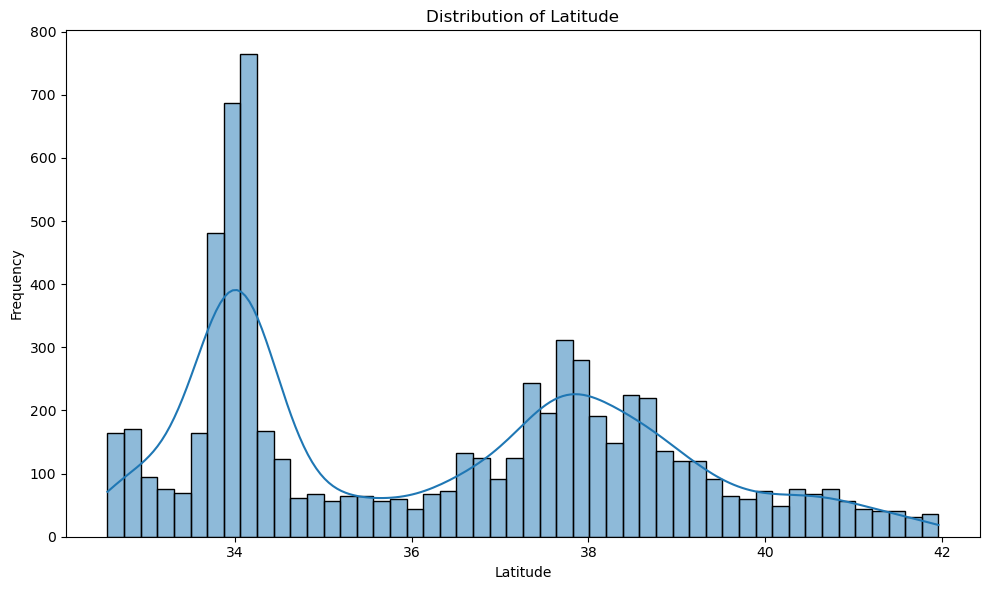

--- Analysis for Longitude (Numerical) ---
Summary Statistics:
 count    7043.000000
mean     -119.798880
std         2.157889
min      -124.301372
25%      -121.815412
50%      -119.730885
75%      -118.043237
max      -114.192901
Name: Longitude, dtype: float64


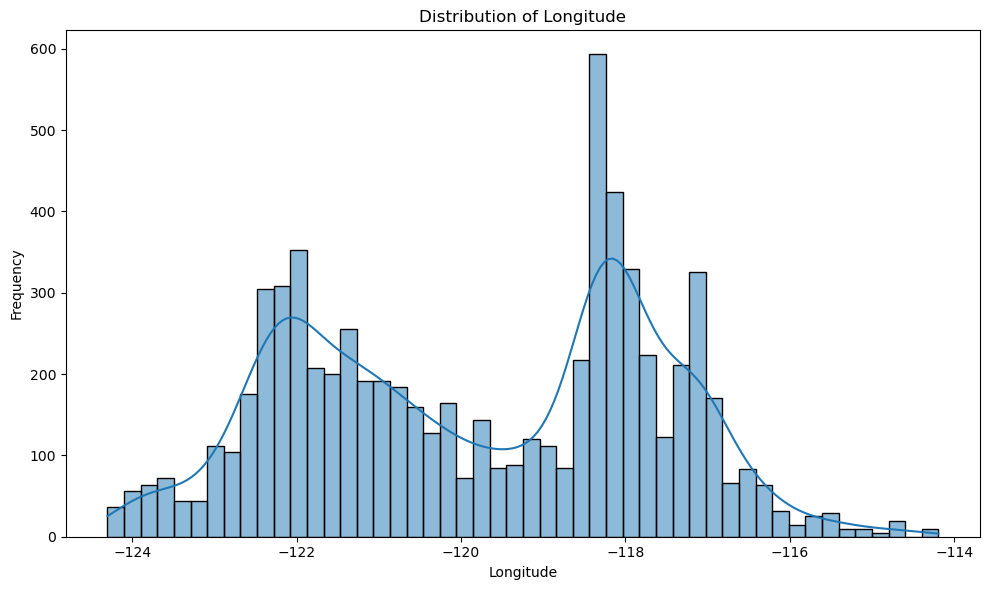

--- Analysis for Gender (Categorical-like) ---
Value Counts:
 Gender
Male      3555
Female    3488
Name: count, dtype: int64

Proportions:
 Gender
Male      0.5048
Female    0.4952
Name: proportion, dtype: float64


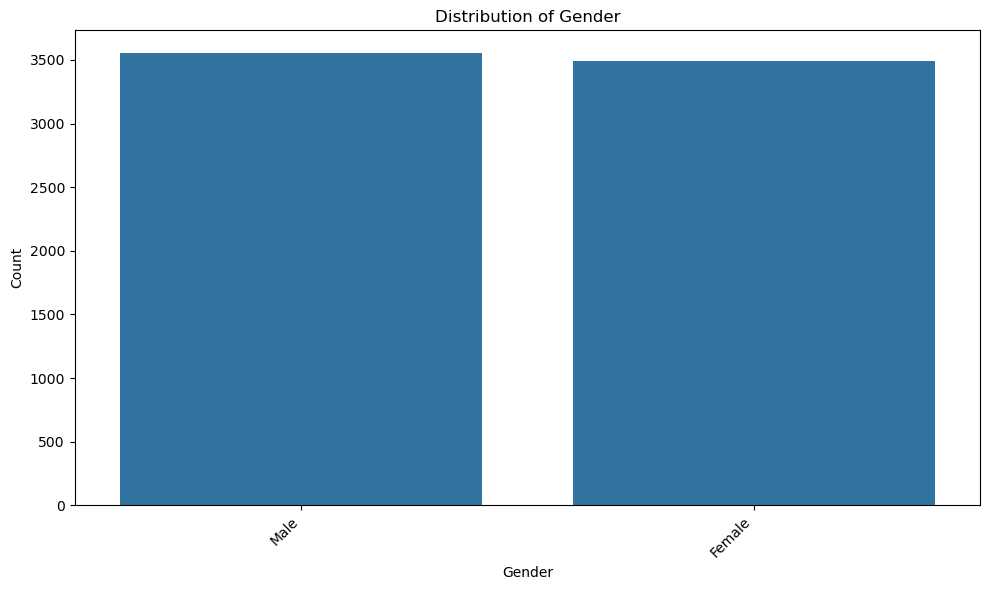

--- Analysis for Senior Citizen (Categorical-like) ---
Value Counts:
 Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

Proportions:
 Senior Citizen
No     0.8379
Yes    0.1621
Name: proportion, dtype: float64


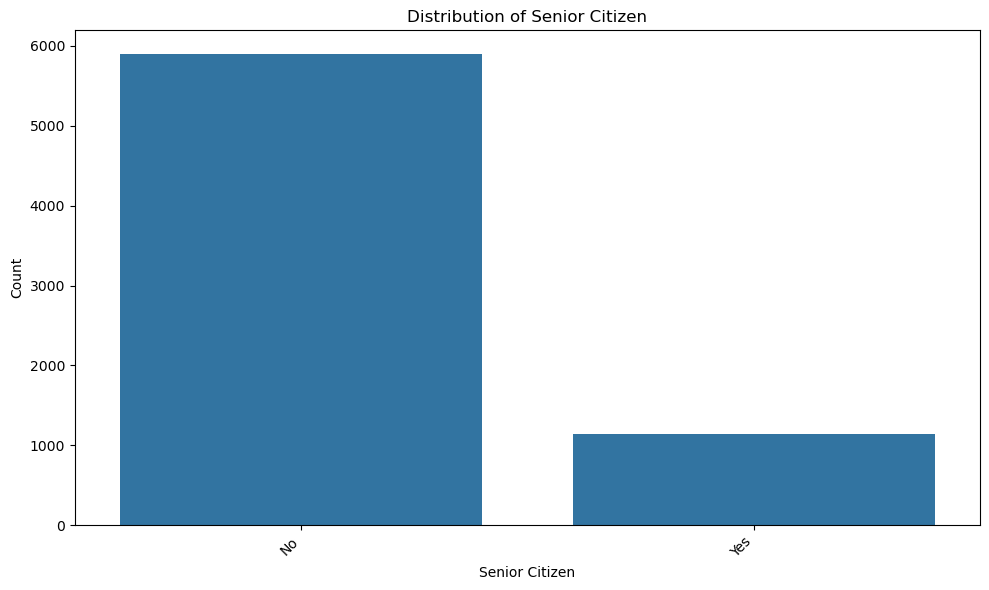

--- Analysis for Partner (Categorical-like) ---
Value Counts:
 Partner
No     3641
Yes    3402
Name: count, dtype: int64

Proportions:
 Partner
No     0.517
Yes    0.483
Name: proportion, dtype: float64


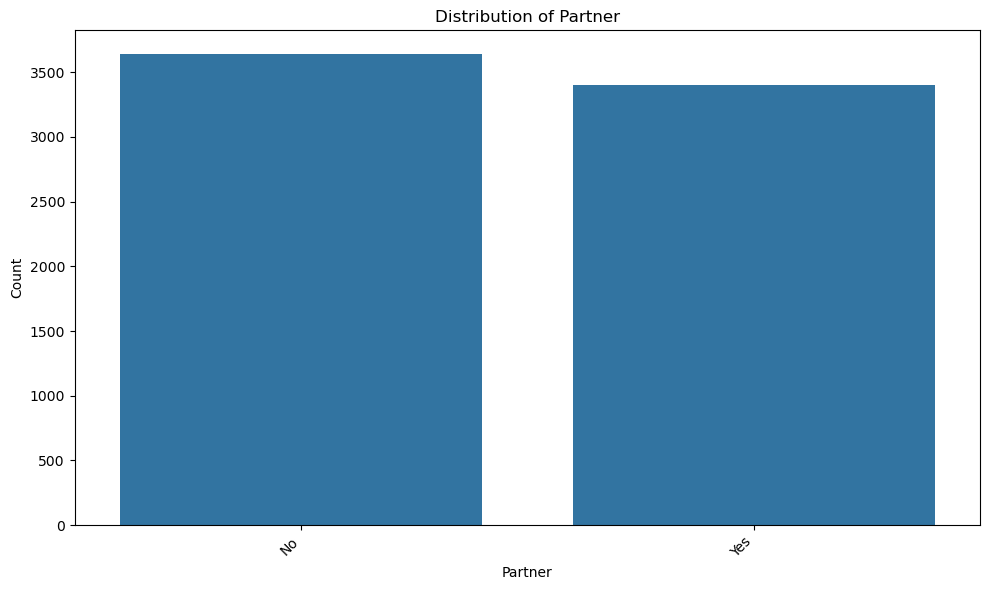

--- Analysis for Dependents (Categorical-like) ---
Value Counts:
 Dependents
No     5416
Yes    1627
Name: count, dtype: int64

Proportions:
 Dependents
No     0.769
Yes    0.231
Name: proportion, dtype: float64


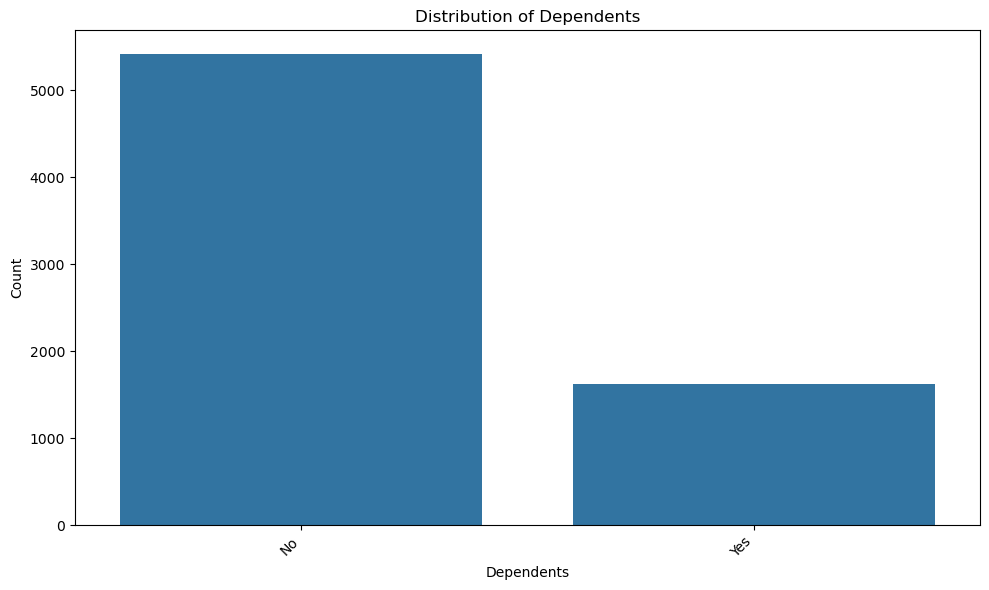

In [30]:
# Inspect the data - Univariate EDA
Demographics_cols = [
    'Country', 'State', 'City', 'Zip Code', 'Latitude',
    'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents'
]

# Define columns that should always be treated as categorical, regardless of the data type
always_categorical = ['City', 'Zip Code', 'Country', 'State']

for col in Demographics_cols:
    # Check if the column is in the "always_categorical" list
    if col in always_categorical:
        print(f"--- Analysis for {col} (Categorical) ---")
        print("Value Counts:\n", df[col].value_counts(dropna=False))
        print("\nProportions:\n", df[col].value_counts(normalize=True, dropna=False).round(4))
        
        # Countplot for categorical data
        plt.figure(figsize=(12, 7))
        sns.countplot(x=col, data=df, order=df[col].value_counts().iloc[:20].index)
        plt.title(f'Distribution of {col} (Top 20)')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    # Apply the previous logic for other columns
    elif df[col].nunique() < 50:
        print(f"--- Analysis for {col} (Categorical-like) ---")
        print("Value Counts:\n", df[col].value_counts(dropna=False))
        print("\nProportions:\n", df[col].value_counts(normalize=True, dropna=False).round(4))
        
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    else:
        print(f"--- Analysis for {col} (Numerical) ---")
        print("Summary Statistics:\n", df[col].describe())
        
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=50)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
   


Country & State

All customers are based in California, United States, as indicated by the single distinct location value in the dataset.

City

The graph shows a highly uneven distribution of customers across cities.  The top five cities alone (Los Angeles (305), San Diego(150), San Jose(112), Sacramento(108), San Francisco(104)) contribute a substantial share of total customers. These areas should be prioritized for marketing campaigns, service enhancements, and upsell efforts. The majority of cities have very few customers, indicating a long-tail distribution. These regions may benefit from localized outreach, but may not justify large-scale investment unless bundled or aggregated. The concentration in specific cities suggests that geo-targeted promotions and region-specific bundles could be highly effective.

Zip Code

The graph shows a uniform distribution of customer counts across the displayed zip codes, with each zip code having approximately 4 to 5 customers. This suggests that There is no dominant Zip Code; Unlike city-level data, no single zip code stands out in terms of customer volume. This indicates a broad and evenly spread customer base across regions. 
There is also potential for regional bundling; Grouping nearby zip codes into broader zones (e.g., metro areas) could help in crafting regional offers or identifying clusters for targeted outreach.

Latitude 

The graph shows a scattered but relatively uniform distribution of customer counts across various latitude values, with most latitudes having 4 to 5 customers and a few showing zero. The consistent count across latitudes suggests that customers are geographically dispersed across a wide north-south range, rather than concentrated in a specific band. No latitude stands out as a dominant cluster, which implies that location-based services or promotions may need to be designed for broad coverage rather than targeted hotspots.
A few latitude values show no customer presence, which could indicate underserved or unpenetrated areas. These might be worth exploring for future expansion or outreach.

Longitude

The graph reveals a widely dispersed customer base across various longitudes, with most values showing 4 to 5 customers, and a few outliers reaching 8 or dropping to zero. The relatively uniform distribution across longitudes suggests that customers are spread horizontally across the region, likely covering a wide geographic area such as multiple counties or even statewide.
Aside from a few slightly higher counts (L : –121.99 with 8 customers), there’s no clear concentration. This implies that location-specific marketing or infrastructure should focus on regional clusters rather than isolated hotspots. Some longitude values show no customer presence, which may indicate unserved or low-demand areas. These could be deprioritized or flagged for future market testing.

Gender 

The graph shows a nearly equal split between male and female customers, with 3,555 males and 3,488 females, each representing approximately 50% of the total customer base.
 While the overall split is even, deeper analysis into gender-based preferences or service adoption patterns (e.g., who subscribes more to streaming or tech support) could uncover micro-targeting opportunities.

Senior Citizen 

The graph shows a significant imbalance in the customer base, with 84% (5,901 customers) not identifying as senior citizens and only 16% (1,142 customers) falling into the senior category. The majority of customers are younger or middle-aged, suggesting that mainstream services and digital offerings should be optimized for tech-savvy users. Though smaller, the senior group may have distinct needs such as simplified interfaces, enhanced customer support, or bundled services like tech assistance and device protection.

Partner

The graph shows a nearly even split between customers who have a partner (48% Yes) and those who do not (52% No), with 3,641 non-partnered and 3,402 partnered individuals. The close distribution suggests that both partnered and non-partnered customers are well represented, allowing for inclusive marketing strategies without heavy bias toward one group. There is a segmentation Potential; This demographic split allows for dual-path targeting, one focused on shared value and convenience, the other on customization and independence.

 Dependents

The graph shows that 77% of customers (5,416 individuals) do not have dependents, while 23% (1,627 individuals) do. 
The majority of customers appear to be single adults or couples without children, which suggests that individual-focused service like single-line plans, solo entertainment, and personal tech support. 
Customers with dependents may have higher service needs, such as multi-line plans, family streaming bundles, device protection, and online security. This group is ideal for family-oriented promotions and value packages.


Summary

All customers are located in California, United States, with a highly uneven city-level distribution. Major urban centres like Los Angeles, San Diego, and San Jose dominate, while most other cities have minimal representation. Zip code, latitude, and longitude data show a broadly dispersed customer base with no dominant clusters, suggesting that regional bundling and wide-coverage strategies may be more effective than hyper-local targeting. Gender distribution is nearly equal, enabling inclusive marketing, while only 16% of customers are senior citizens, indicating a predominantly younger, tech-savvy audience. The partner status is evenly split, allowing for dual-path targeting based on shared versus individual value. However, 77% of customers do not have dependents, pointing to a strong base for individual-focused services, while the remaining 23% represent a valuable segment for family-oriented bundles and upsell opportunities. Together, these insights support a strategy built on segmentation, regional clustering, and tailored service offerings to maximize engagement and growth.








--- Analysis for Tenure Months (Categorical) ---
Value Counts:
 Tenure Months
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Proportions:
 Tenure Months
1     0.0870
72    0.0514
2     0.0338
3     0.0284
4     0.0250
       ...  
28    0.0081
39    0.0080
44    0.0072
36    0.0071
0     0.0016
Name: proportion, Length: 73, dtype: float64


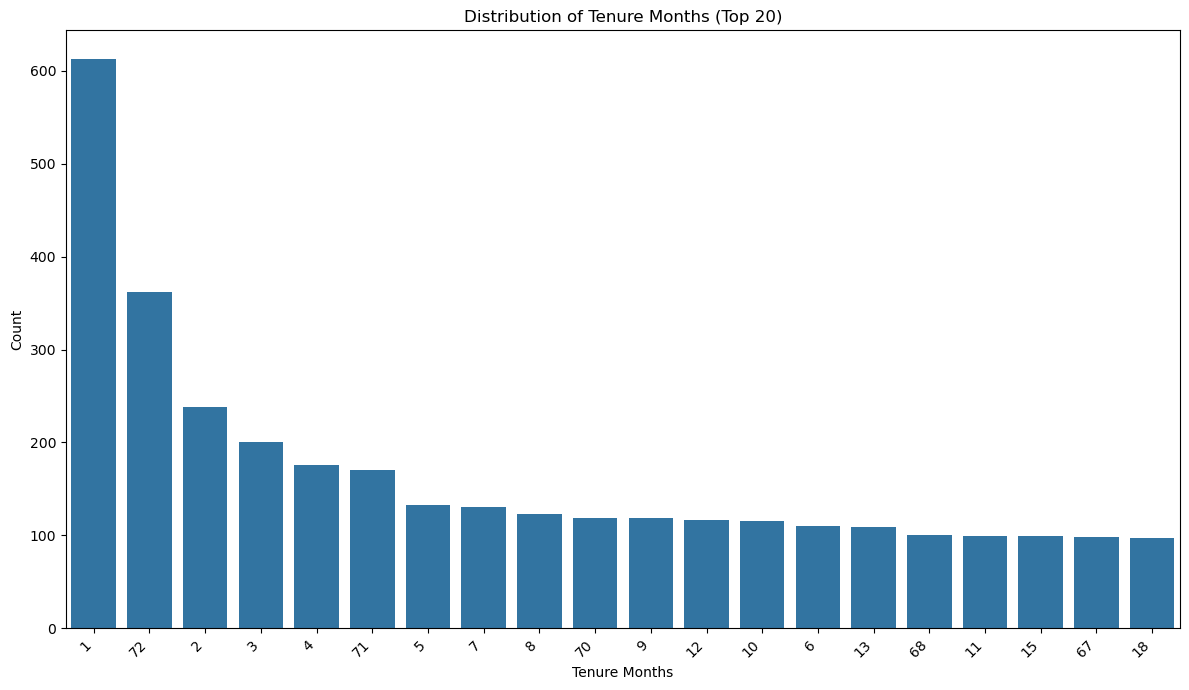

--- Analysis for Contract (Categorical-like) ---
Value Counts:
 Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Proportions:
 Contract
Month-to-month    0.5502
Two year          0.2407
One year          0.2091
Name: proportion, dtype: float64


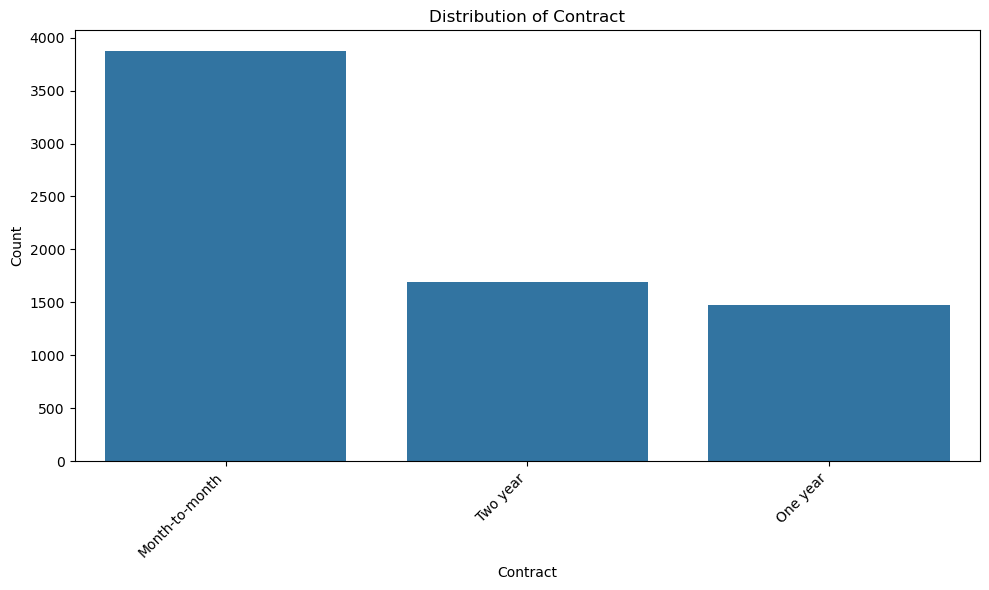

--- Analysis for Paperless Billing (Categorical-like) ---
Value Counts:
 Paperless Billing
Yes    4171
No     2872
Name: count, dtype: int64

Proportions:
 Paperless Billing
Yes    0.5922
No     0.4078
Name: proportion, dtype: float64


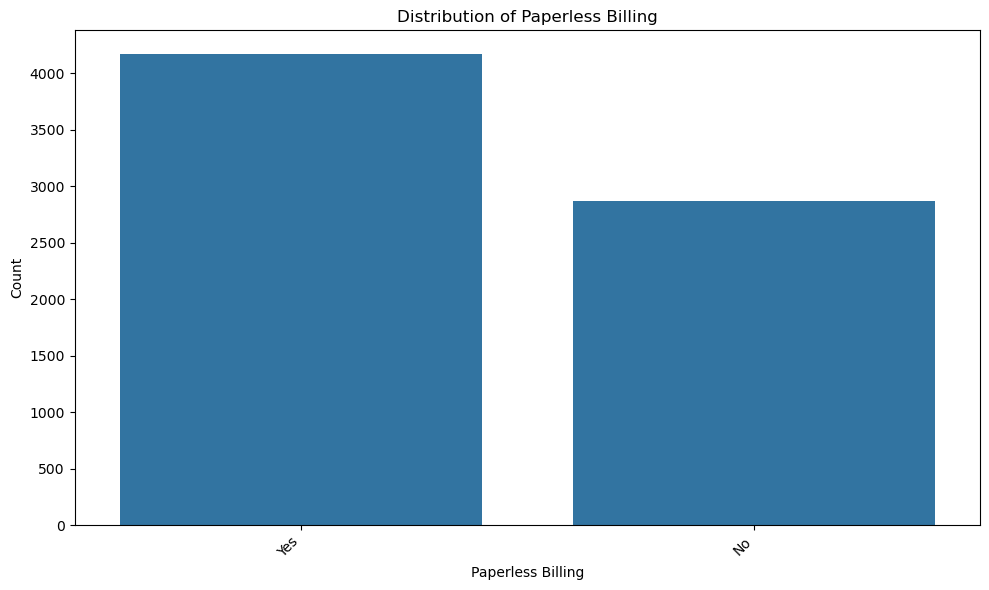

--- Analysis for Payment Method (Categorical-like) ---
Value Counts:
 Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Proportions:
 Payment Method
Electronic check             0.3358
Mailed check                 0.2289
Bank transfer (automatic)    0.2192
Credit card (automatic)      0.2161
Name: proportion, dtype: float64


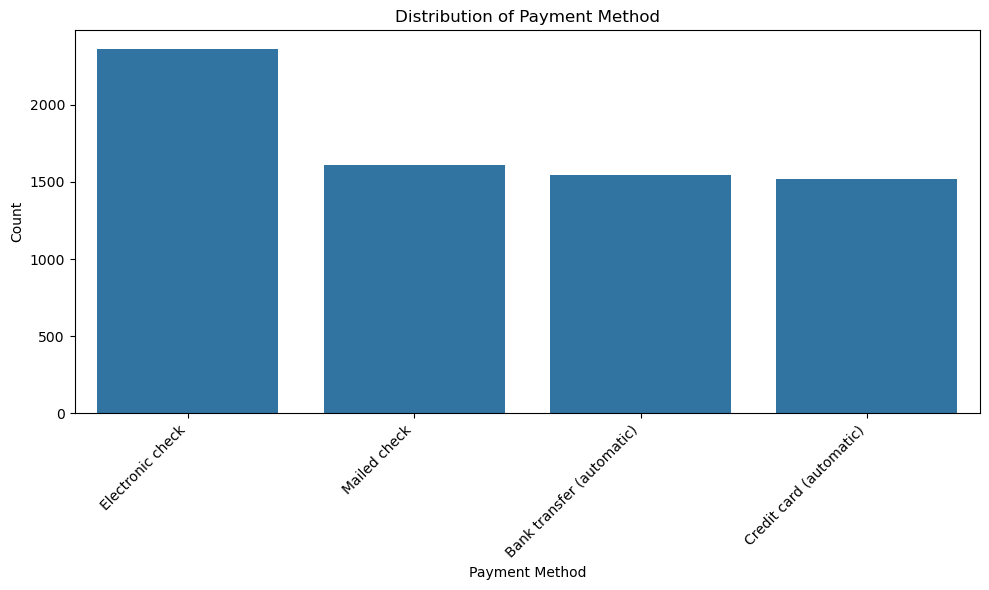

In [31]:
#Inspect the data - Univariate EDA
Payment_cols = ['Tenure Months', 'Contract', 'Paperless Billing', 'Payment Method']

# Define columns that should always be treated as categorical, regardless of unique values
always_categorical = ['Tenure Months']

for col in Payment_cols:
    # Check if the column is in the "always_categorical" list
    if col in always_categorical:
        print(f"--- Analysis for {col} (Categorical) ---")
        
        # Print value counts (frequency)
        print("Value Counts:\n", df[col].value_counts(dropna=False))
        
        # Print proportions
        print("\nProportions:\n", df[col].value_counts(normalize=True, dropna=False).round(4))
        
        # Plot a countplot, limiting the number of bars for readability
        plt.figure(figsize=(12, 7))
        sns.countplot(x=col, data=df, order=df[col].value_counts().iloc[:20].index)
        
        plt.title(f'Distribution of {col} (Top 20)')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    # Apply the previous logic for other columns
    elif df[col].nunique() < 50:
        print(f"--- Analysis for {col} (Categorical-like) ---")
        print("Value Counts:\n", df[col].value_counts(dropna=False))
        print("\nProportions:\n", df[col].value_counts(normalize=True, dropna=False).round(4))
        
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    else:
        print(f"--- Analysis for {col} (Numerical) ---")
        print("Summary Statistics:\n", df[col].describe())
        
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=50)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()


Tenure Months
 
Tenure Months represents the total duration a customer has been with the company. The distribution is multimodal, with two prominent peaks: The highest peak occurs at 1 month, accounting for 8.7% of customers, suggesting a large influx of new or short-term users. A secondary peak appears around 72 months, representing 5.14% of customers, indicative of a loyal, long-term segment. There is a steep decline in customer count after the initial month, highlighting poor early retention. After approximately 10 months, the decline flattens, and tenure values stabilize at lower levels.
The data suggests that the majority of churn happens within the first 1–3 months, making the initial 30–90 days critical. To improve retention, marketing efforts should prioritize; streamlined onboarding, proactive customer support and early engagement strategies. 

Contract
• Distribution
– Month-to-month : 3875 customers   ≈ (55%)
– Two year :  1695  customers ≈  (24%)
– One year :   1473 customers ≈ (21%)

Over half of the customer base (55%) opts for month-to-month contracts, underscoring a strong preference for flexibility and revealing significant revenue volatility, since these customers can churn at any time. In contrast, only 45% commit to longer-term agreements 24% on two-year plans and 21% on one-year , though two-year contracts slightly outperform one-year ones. This distribution highlights both the competitive, price-sensitive nature of the market and the business’s challenge in recouping acquisition costs before customers leave. To improve lifetime value, we should analyse actual churn rates by contract type, then design targeted incentives such as discounts or premium features to encourage longer-term commitments among high-risk month-to-month subscribers.

Paperless Billing

• Distribution
– Yes  : 4171 customers   ≈ (59%)
– No   : 2872  customers ≈  (41%)

A majority of customers (59%) have chosen paperless billing. The remaining 41% of customers who still receive paper bills may represent a distinct segment. This group could be characterized by traits such as being less tech-savvy or belonging to a more traditional demographic. This data is valuable for customer segmentation and targeted marketing strategies.


Payment Method

• Distribution
	– Electronic check : 2365 customers ≈  (34%)
– Mailed check : 1612 customers ≈  (23%)
– Bank transfer (automatic) : 1544 customers ≈  (22%)
– Credit card (automatic) : 1522 customers ≈  (22%)

34% of customers chose to pay via electronic checks, 23% mailed their checks, 22% used automatic bank transfers, and the remaining opted for automatic credit card payments.
The data suggests customers value flexibility and choice in payment methods. The dominance of electronic checks combined with significant usage of all other methods indicates that maintaining multiple payment channels serves different customer needs and preferences effectively.
	

Summary

This customer analysis reveals a business with strong recent acquisition momentum (613 new customers in the past month representing 8.8% of the base) and solid long-term loyalty (46.9% of customers have 3+ years tenure), but faces significant revenue volatility challenges due to customer preferences for flexibility over commitment. The majority of customers (55%) choose month-to-month contracts over longer-term agreements, while 59% have adopted paperless billing, and payment methods are distributed relatively evenly across electronic checks (34%), mailed checks (23%), automatic bank transfers (22%), and automatic credit card payments (22%). These patterns indicate a competitive, price-sensitive market where customers value choice and flexibility in their service arrangements, suggesting the company should focus on retention strategies and incentives to encourage longer-term commitments among the substantial month-to-month customer base to improve lifetime value and reduce churn risk.

--- Analysis for Monthly Charges (Numerical) ---
Summary Statistics:
 count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly Charges, dtype: float64


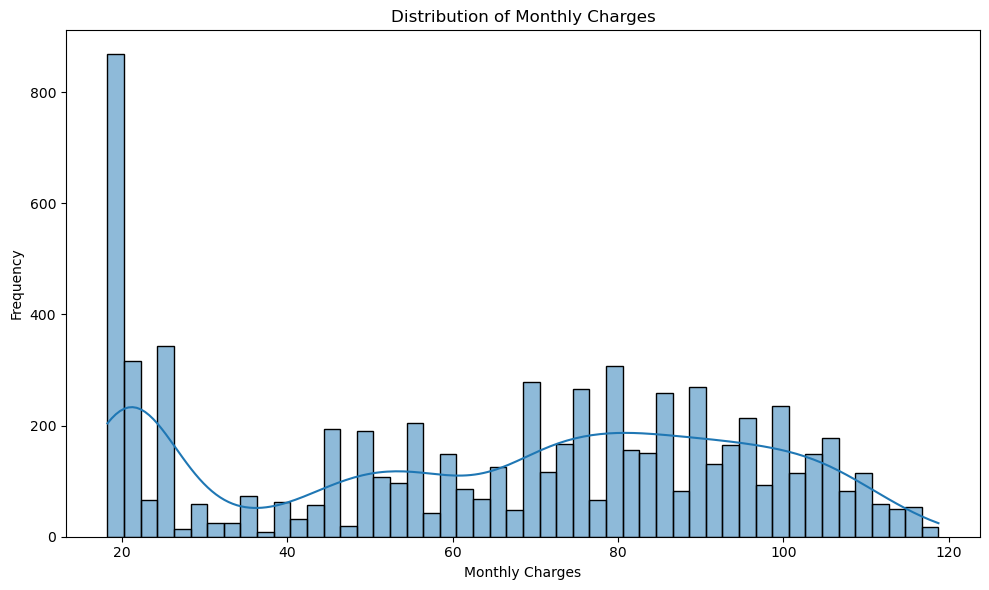

--- Analysis for Total Charges (Numerical) ---
Summary Statistics:
 count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Total Charges, dtype: float64


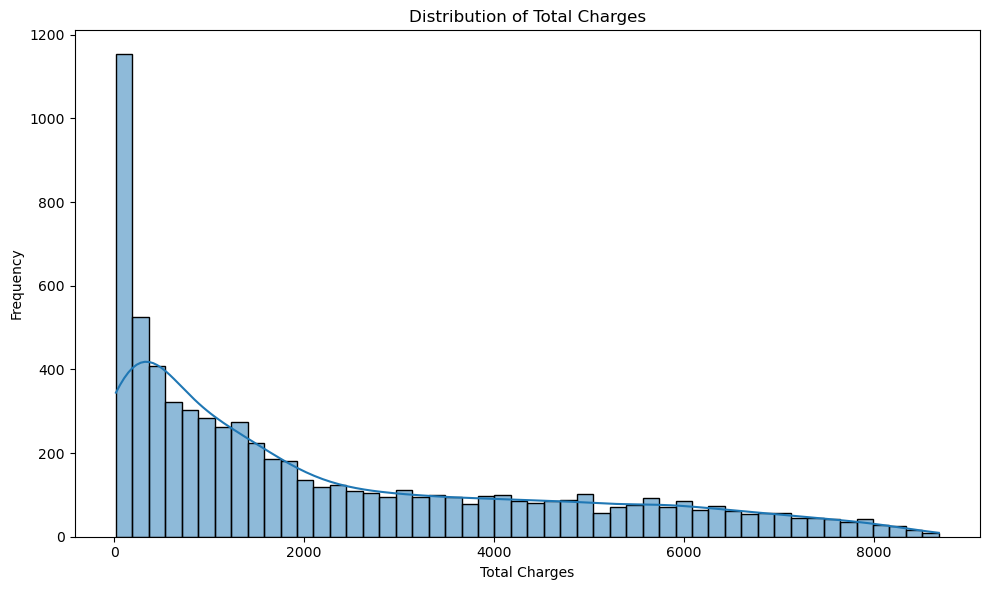

--- Analysis for CLTV (Numerical) ---
Summary Statistics:
 count    7043.000000
mean     4400.295755
std      1183.057152
min      2003.000000
25%      3469.000000
50%      4527.000000
75%      5380.500000
max      6500.000000
Name: CLTV, dtype: float64


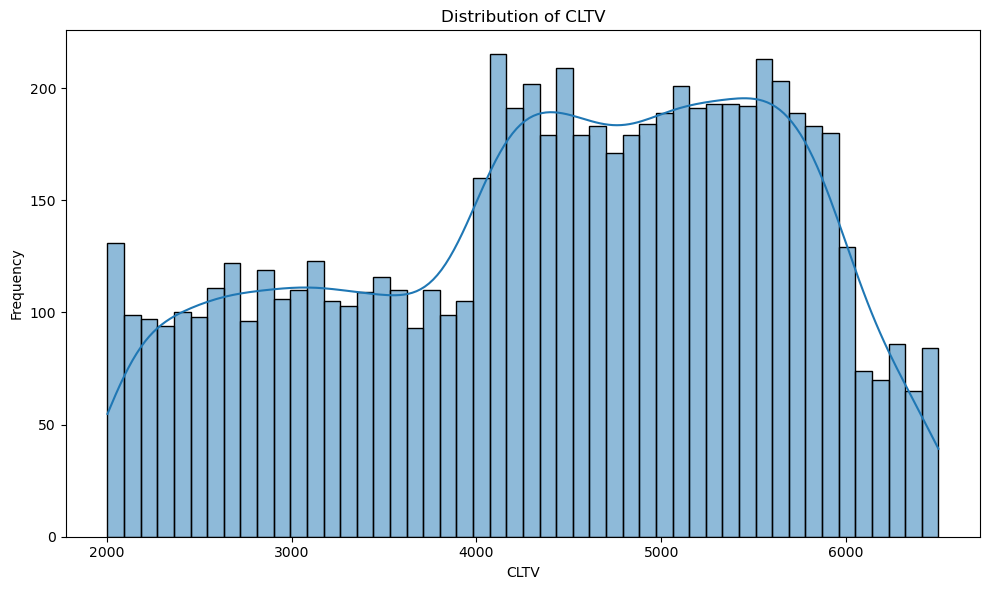

In [32]:
# Inspect the data - Univariate EDA

Financial_cols = ['Monthly Charges', 'Total Charges', 'CLTV']

for col in Financial_cols:
    # Check if the column is categorical or numerical based on the number of unique values
    # A count less than 50 is a common for a categorical-like distribution.
    if df[col].nunique() < 50:
        print(f"--- Analysis for {col} (Categorical-like) ---")
        print("Value Counts:\n", df[col].value_counts(dropna=False))
        print("\nProportions:\n", df[col].value_counts(normalize=True, dropna=False).round(4))
        
        # Use a countplot for categorical-like data
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    else:
        print(f"--- Analysis for {col} (Numerical) ---")
        # For numerical data
        print("Summary Statistics:\n", df[col].describe())
        
        # Use a histogram for numerical data
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=50) # 'kde' adds a density curve, 'bins' can be adjusted
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

 Monthly Charges 

The distribution of monthly charges is multimodal, reflecting distinct customer plan tiers. Two large clusters are at the low end; highest major peak around $18 -$20 and the second highest peak around $25 - $30, showing that many customers are concentrated on entry-level, low-cost plans. Additional popular tiers appear around $70–80 and $100, indicating mid-to-high value customer segments. Half of the customers (the middle 50%) pay between $35 and $90 per month, with charges ranging from a minimum of $18 to a maximum of $199, highlighting a wide spread in spending power. The average ($64.76) and median ($70.35) are very close, confirming a relatively balanced distribution with only slight skewness due to the large base of low-paying users.
Given that many customers are currently on the lowest-tier plan (likely $18 – $20), there may be opportunities to upsell or cross-sell in order to boost monthly revenue.

Total Charges

The cumulative Total Charges recorded through Q3 (9 months) show a distinctly right-skewed distribution, with the majority of customers incurring less than €2,000, which aligns with the natural accumulation of charges over time. The data exhibits substantial variability with a high standard deviation (~2,267), and charges ranging from $18.80 to $8,684.80, reflecting diverse customer tenures and pricing structures.
The interquartile range reveals that the middle 50% of customers are paying between approximately $401 and $3,795 in total charges, while a smaller subset of loyal, long-term customer accounts for the highest charges. This spread presents clear opportunities for customer segmentation, using charge levels as a proxy for tenure and value. Tailored marketing and retention strategies should focus on both growing the revenue from low and mid-tier segments and preserving the loyalty of high-value clients, ensuring optimized customer lifetime value and sustained revenue growth.

CLTV (Customer Lifetime Value)

The Customer Lifetime Value (CLTV) data shows a distribution that is close to normal but slightly left-skewed, with a subtle increase in frequency toward the middle range where most customers are concentrated between $4,000 and $6,000. The standard deviation of approximately 1,183 indicates moderate variability in lifetime value among customers. About 25% of customers have a CLTV below $3,469, reflecting shorter tenure or lower spending, while half of the customers have values between $3,469 and $5,380, representing longer tenure and higher spending groups. The majority of revenue is generated by higher-spending customers in the upper CLTV range.
This distribution offers an opportunity to segment customers into low-, mid-, and high-value groups, allowing for tailored offers and service strategies aimed at increasing overall customer lifetime value. By focusing on growing value among lower and mid-tier customers and maximizing retention and engagement of high-value customers, the business can drive sustained revenue growth and improve customer loyalty.

--- Analysis for Churn Label (Categorical-like) ---
Value Counts:
 Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

Proportions:
 Churn Label
No     0.7346
Yes    0.2654
Name: proportion, dtype: float64


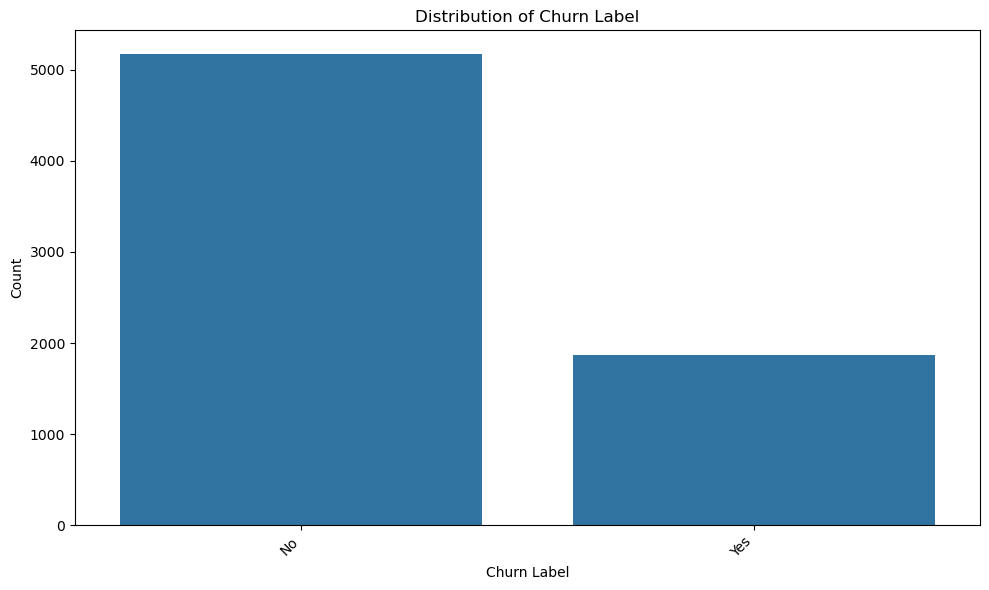

--- Analysis for Churn Value (Categorical-like) ---
Value Counts:
 Churn Value
0    5174
1    1869
Name: count, dtype: int64

Proportions:
 Churn Value
0    0.7346
1    0.2654
Name: proportion, dtype: float64


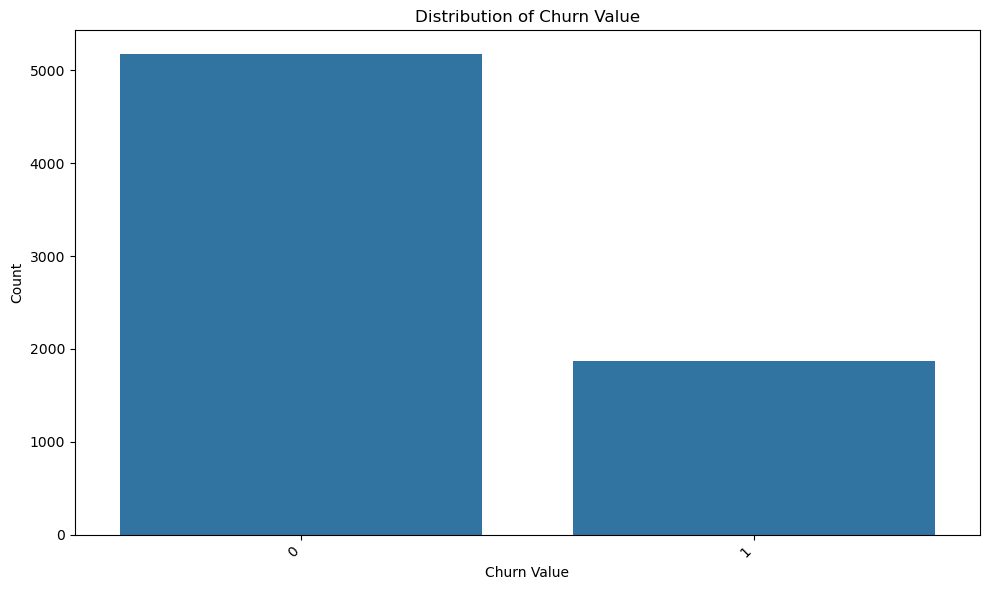

--- Analysis for Churn Score (Numerical) ---
Summary Statistics:
 count    7043.000000
mean       58.699418
std        21.525131
min         5.000000
25%        40.000000
50%        61.000000
75%        75.000000
max       100.000000
Name: Churn Score, dtype: float64


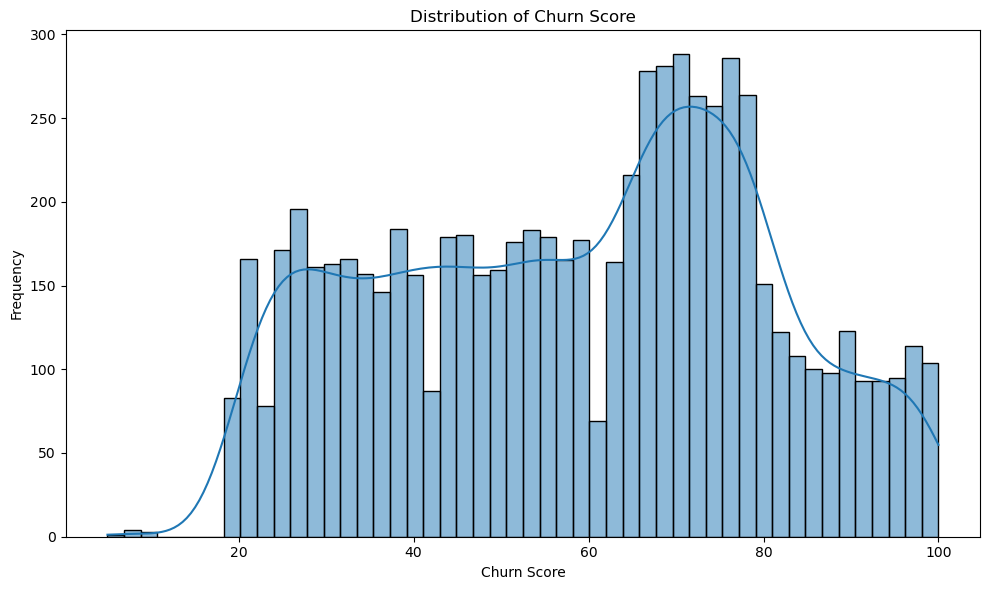

--- Analysis for Churn Reason (Categorical-like) ---
Value Counts:
 Churn Reason
NaN                                          5174
Attitude of support person                    192
Competitor offered higher download speeds     189
Competitor offered more data                  162
Don't know                                    154
Competitor made better offer                  140
Attitude of service provider                  135
Competitor had better devices                 130
Network reliability                           103
Product dissatisfaction                       102
Price too high                                 98
Service dissatisfaction                        89
Lack of self-service on Website                88
Extra data charges                             57
Moved                                          53
Lack of affordable download/upload speed       44
Long distance charges                          44
Limited range of services                      44
Poor expertise of p

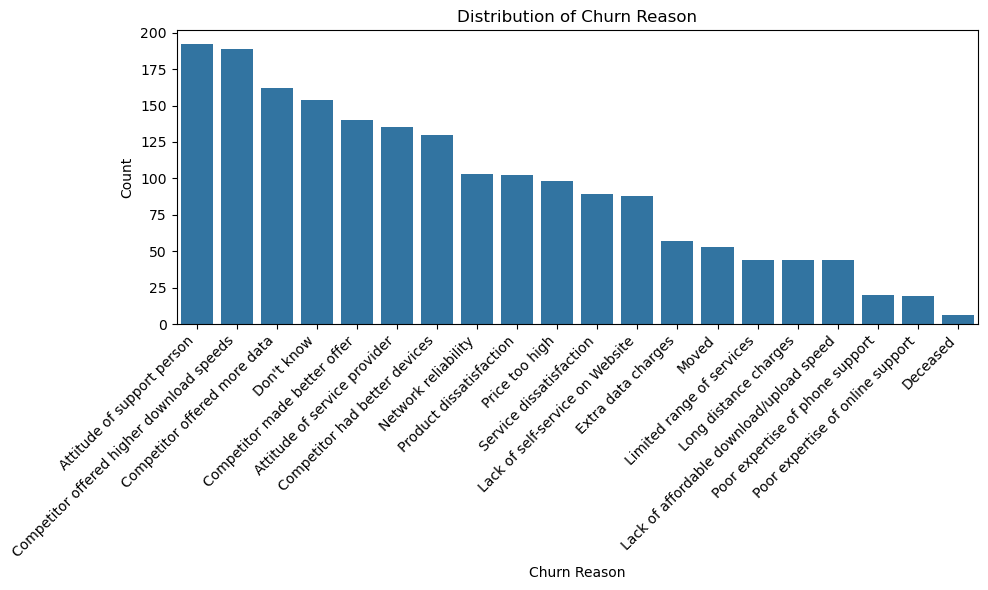

In [33]:
# Inspect the data - Univariate EDA

Targets_cols = ['Churn Label', 'Churn Value', 'Churn Score', 'Churn Reason']

for col in Targets_cols:
    # Check if the column is categorical or numerical based on the number of unique values
    # A count less than 50 is a common for a categorical-like distribution.
    if df[col].nunique() < 50:
        print(f"--- Analysis for {col} (Categorical-like) ---")
        print("Value Counts:\n", df[col].value_counts(dropna=False))
        print("\nProportions:\n", df[col].value_counts(normalize=True, dropna=False).round(4))
        
        # Use a countplot for categorical-like data
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    else:
        print(f"--- Analysis for {col} (Numerical) ---")
        # For numerical data
        print("Summary Statistics:\n", df[col].describe())
        
        # Use a histogram for numerical data
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=50) 
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

Churn Label

Only 26% of customers have churned, while 73% remain loyal to the company. This means approximately 1 in 4 customers have left, indicating a moderately high churn rate that warrants immediate attention.

Churn Value

The churn value is the numerical binary representation of the churn label, conveying the same information: 26% of customers have churned, while 73% have remained loyal to the company.

Churn Score

Churn Score is a numerical value ranging from 0 to 100, representing the likelihood that a customer will churn based on multiple factors known to influence churn risk. A higher score indicates a greater probability of customer attrition.
The distribution of the churn score is multimodal, exhibiting three prominent peaks: the first around 20-40, the second near 45-60, and the third, which is the highest, around 65-80. This suggests the presence of distinct customer segments with varying churn risk profiles.
The distribution is slightly left-skewed, as evidenced by the mean (58.69) being slightly less than the median (61.00), with a small tail on the lower end of the score spectrum. The standard deviation (21.5) and range (5–100) indicate significant diversity in customer risk, justifying targeted interventions rather than a one-size-fits-all approach.
Notably, half of the customers have a churn score above 61, confirming that a substantial segment falls into higher-risk categories, as highlighted by the highest peak in the distribution. These clusters warrant detailed analysis to uncover the key drivers of churn within each group, enabling tailored and effective retention strategies.


Churn Reason
	• Distribution
– Attitude of support person                 : 192 customers ≈ (2.73%)
– Competitor offered higher download speeds  : 189 customers ≈ (2.68%)
– Competitor offered more data               : 162 customers ≈ (2.30%)
– Don't know                                 : 154 customers ≈ (2.19%)
– Competitor made better offer               : 140 customers ≈ (1.99%)
– Attitude of service provider               : 135 customers ≈ (1.92%)
– Competitor had better devices              : 130 customers ≈ (1.85%)
– Network reliability                        : 103 customers ≈ (1.46%)
– Product dissatisfaction                    : 102 customers ≈ (1.45%)
– Price too high                             : 98 customers  ≈ (1.39%)
– Service dissatisfaction                    : 89 customers  ≈ (1.26%)
– Lack of self-service on Website            : 88 customers  ≈ (1.25%)
– Extra data charges                         : 57 customers  ≈ (0.81%)
– Moved                                      : 53 customers  ≈ (0.75%)
– Lack of affordable download/upload speed   : 44 customers  ≈ (0.62%)
– Long distance charges                      : 44 customers  ≈ (0.62%)
– Limited range of services                  : 44 customers  ≈ (0.62%)
– Poor expertise of phone support            : 20 customers  ≈ (0.28%)            
– Poor expertise of online support           : 19 customers  ≈ (0.27%)              
– Deceased                                   : 6  customers  ≈ (0.09%)     


Approximately 73.46% of the churn score feature data is missing. This missingness is not random but aligns with the retention rate, as the same 73.46% of customers remained with the company. This indicates that churn scores were assigned only to the 26.54% of customers who actually churned. Consequently, the data presented in the chart represents this churned segment exclusively.
The top five recorded churn reasons are:
	• Attitude of support person
	• Competitor offered higher download speeds
	• Competitor offered more data
	• Don’t know
	• Competitor made better offer
	
For clearer interpretation, these reasons can be grouped as follows:

Service and Support Issues (5.2%)
Negative customer experiences related to the attitude and expertise of support personnel, including poor phone and online support skills, were frequently cited.

Competitive Pressure (8.82%)
Many customers left due to competitors offering higher download speeds, more data, better devices, and superior overall offers, underscoring the intensity of market competition.

Service Quality and Network Issues (5.41%)
Dissatisfaction with network reliability, product/service quality, affordability of download/upload speeds, and limited service options were notable contributors.

Pricing Concerns (2.82%)
Pricing-related issues such as high costs, extra data charges, and long-distance fees influenced churn.

Other Factors
Additional reasons include lack of self-service options on the website, deceased customers, and those who moved locations.

Overall, the dominance of competitive pressure highlights the importance of continuous market monitoring and agile responsiveness to competitor offerings. Simultaneously, deficiencies in service quality and customer support reveal critical internal areas for improvement, particularly in staff training and technical assistance.

### EDA - Bivariate analysis

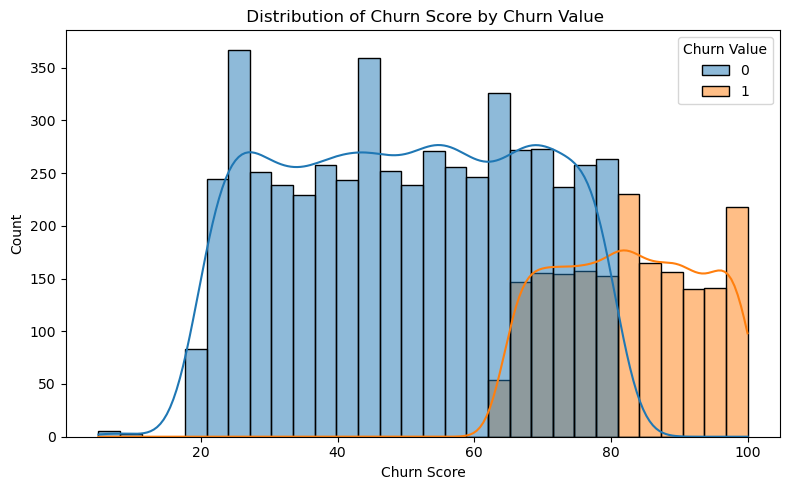

In [34]:
# EDA - Bivariate - Churn Score vs Churn Value

plt.figure(figsize=(8,5))
ax = sns.histplot(data=df, x='Churn Score', hue='Churn Value', kde=True, bins=30)
plt.title(' Distribution of Churn Score by Churn Value')
plt.tight_layout()
plt.show()

Customers who did not churn ( blue colour) tend to have lower churn scores, mostly between 20 and 70. Customers who did churn (orange colour) are concentrated at higher churn scores, especially above 80. This suggests that the churn score is a strong predictor of churn behaviour. There is some overlap in churn scores around the 60–80 range, indicating that in this intermediate region, both churned and non-churned customers are present. We can set a threshold churn score (e.g. 65) based on business objectives to flag at-risk customers for proactive retention strategies and  focus retention efforts on those in the overlap (65–80), where churn risk is significant but not certain.

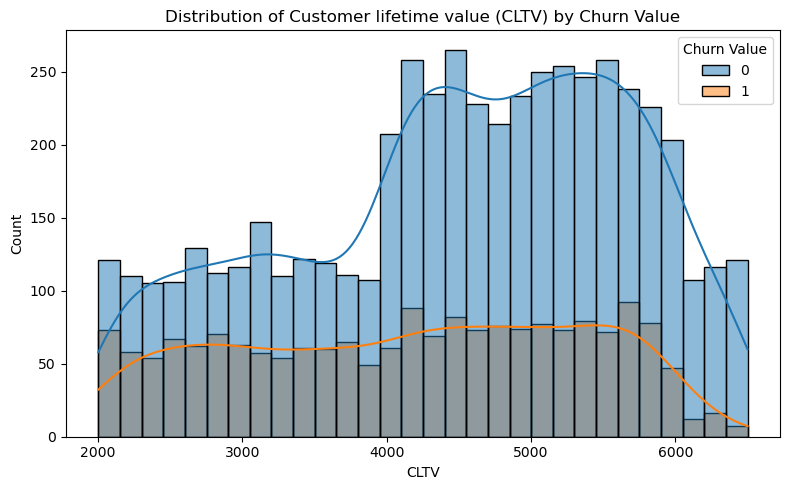

In [35]:
# EDA - Bivariate - CLTV vs Churn Value

plt.figure(figsize=(8,5))
ax = sns.histplot(data=df, x='CLTV', hue='Churn Value', kde=True, bins=30)
plt.title('Distribution of Customer lifetime value (CLTV) by Churn Value')
plt.tight_layout()
plt.show()

The distribution of Customer Lifetime Value (CLTV) among customers is uneven, with a clear peak between approximately 4,000 and 6,000. There are noticeably fewer customers at the lowest (below 2,500) and highest (above 6,000) CLTV values.
Most of the customer base consists of non-churned customers (blue colour), whose CLTV distribution closely follows the overall pattern, especially concentrated in the 4,000 to 6,000 range. Churned customers (orange colour) represent a smaller portion of the total, and their CLTV distribution is flatter compared to non-churned customers. While churned customers are present across all ranges, there is a broad presence in the mid-range CLTV values (roughly 4,000 to 5,800). This indicates that even customers with moderate to relatively high lifetime value are at risk of churning, not just those with lower value.
These insights suggest that retention efforts should not be limited only to low-value customers. Proactive strategies and tailored marketing initiatives should also focus on customers in the lower-to-mid CLTV segments (for example, 2,000–3,000 and 4,500–6,000), since churn is more prevalent in these groups. Targeted engagement and personalized service for these segments can address their specific needs and potentially reduce overall churn, protecting both immediate and long-term business value.

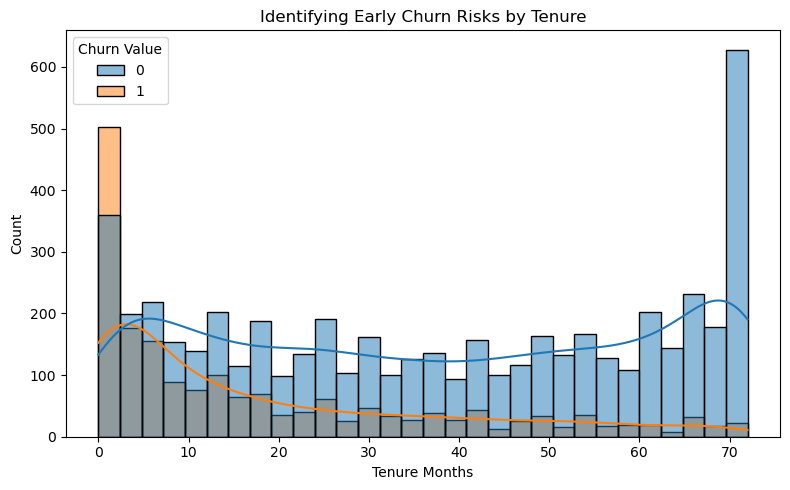

In [36]:
# EDA - Bivariate - Tenure Months vs Churn Value

plt.figure(figsize=(8,5))
ax = sns.histplot(data=df, x='Tenure Months', hue='Churn Value', kde=True, bins=30)
plt.title('Identifying Early Churn Risks by Tenure')
plt.tight_layout()
plt.show()

Churned customers (orange colour) show a right-skewed distribution with a pronounced peak at low tenure, indicating a high churn rate during the first few months post-onboarding. After this initial period, churn rates decline significantly, with customers remaining beyond 10–15 months more likely to stay. Non-churned customers (blue colour) exhibit a more evenly spread tenure distribution, with a notable concentration among longer-tenured customers. This pattern demonstrates a strong association between customer tenure and churn behaviour. To improve retention, businesses should focus on the critical first 10–15 months with enhanced onboarding and continuous customer support to better meet customer needs.

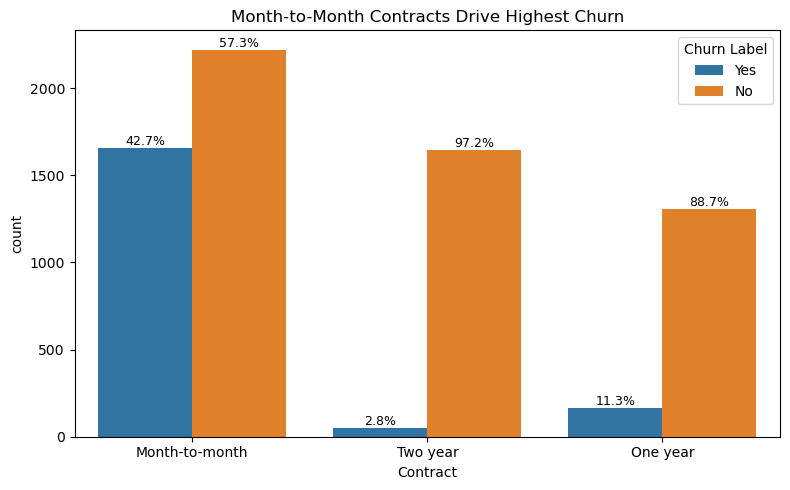

In [37]:
# EDA - Bivariate - Contract vs Churn Label


plt.figure(figsize=(8,5))
ax = sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title('Month-to-Month Contracts Drive Highest Churn')

# Calculate the percentages
for c_ind, container in enumerate(ax.containers):
    for bar in container:
        height = bar.get_height()
        contract = bar.get_x() + bar.get_width()/2
        # Total for that contract category
        cat = bar.get_x() + bar.get_width()/2
        xval = bar.get_x() + bar.get_width() / 2
        contract_type = ax.get_xticklabels()[int(bar.get_x() + 0.5)].get_text()
        total = df[df['Contract'] == contract_type].shape[0]
        percent = height / total * 100 if total > 0 else 0
        ax.annotate(f"{percent:.1f}%", 
                    (bar.get_x() + bar.get_width()/2, height), 
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


The chart clearly shows that month-to-month contracts have the highest churn rate among all contract types, with approximately 42.7% of these customers having churned. In comparison, the churn rate for one-year contract is significantly lower, at 11.3%, reflecting a reduction of over 70% relative to month-to-month contracts. The two-year contract group exhibits the lowest churn rate, at just 2.8%, indicating that customers who commit to longer-term contracts tend to be more loyal and less likely to leave.
This trend highlights a strong association between contract duration and customer churn, suggesting that longer commitments significantly improve customer retention. Customers on longer-term contracts likely perceive greater value or face higher switching costs, which increases their loyalty. These insights highlight potential strategies for targeted marketing and customer retention. Encouraging month-to-month subscribers to transition to longer-term contracts such as one or two year plans through personalized incentives or special offers could significantly reduce churn. Additionally, enhancing the value proposition for existing one-year contract customers may further strengthen retention efforts.

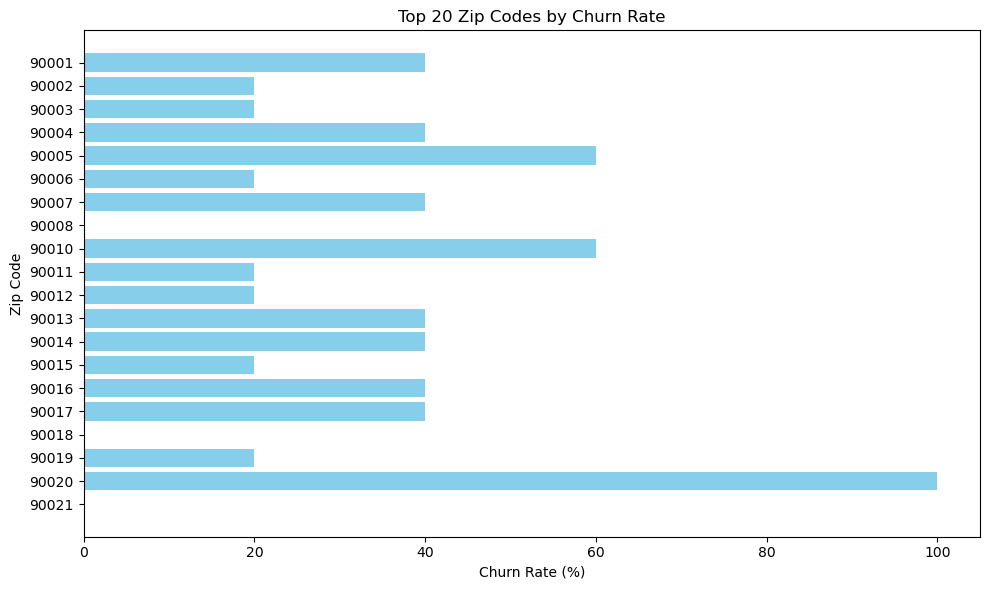

In [38]:
# EDA - Bivariate - zip Code vs churn rate 
top_n = 20
churn_rate_by_zip = df.groupby('Zip Code')['Churn Value'].mean().reset_index()
top_zip = churn_rate_by_zip.head(top_n)
plt.figure(figsize=(10, 6))
plt.barh(top_zip['Zip Code'].astype(str), top_zip['Churn Value'] * 100, color='skyblue')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Zip Code')
plt.title('Top 20 Zip Codes by Churn Rate')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


The analysis of churn rates by zip code reveals significant geographic variation in customer loyalty, with rates ranging from 20% to nearly 100%. Zip code 90020 shows the highest churn, followed by 90005 and 90010, pointing to possible service issues, strong competition, or demographic mismatches. Since all zip codes fall within the 900xx range likely in the Los Angeles area the data suggests that neighbourhood-level factors, rather than broad regional trends, heavily influence retention. Targeted interventions in high-risk areas, proactive programs in moderate-churn zones, and learning from low-churn regions could help improve customer loyalty. The findings highlight the need for location-specific strategies, including tailored pricing, service enhancements, and focused resource allocation.

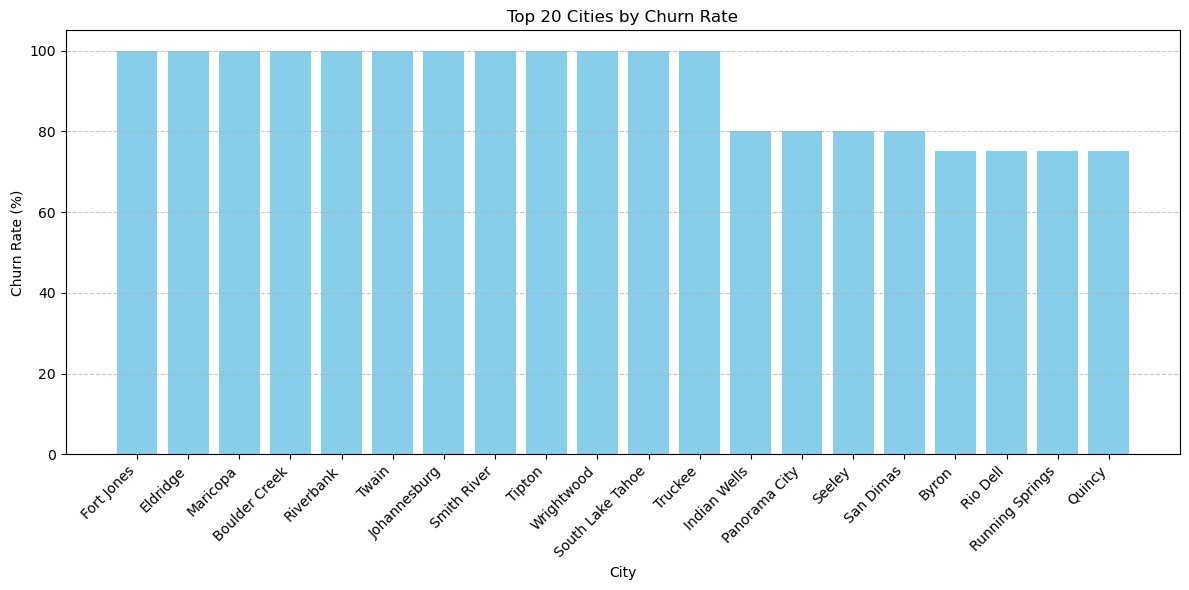

In [39]:
# EDA - Bivariate - City vs churn rate 

# Group the data by 'City' and calculate the mean of the 'Churn Value'
churn_rate_by_city = df.groupby('City')['Churn Value'].mean().reset_index()

# Sort the data by churn rate in descending order
churn_rate_by_city = churn_rate_by_city.sort_values(by='Churn Value', ascending=False)

# Select only the top 20 cities
top_20_cities = churn_rate_by_city.head(20)

# Create the bar chart visualization
plt.figure(figsize=(12, 6))
plt.bar(top_20_cities['City'], top_20_cities['Churn Value'] * 100, color='skyblue')
plt.xlabel('City')
plt.ylabel('Churn Rate (%)')
plt.title('Top 20 Cities by Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Exceptionally High Churn Rates in almost every city listed shows churn rates close to or at 100%. That’s not just high, it’s extreme. It suggests that nearly all customers in these areas are leaving a service or provider within a given period.
The cities span a wide geographic range from Fort Jones in California to Juneau in Alaska. This implies the issue isn’t isolated to one region but may reflect broader systemic challenges.
Many of these cities (e.g., Smith River, Chaffee, Running Springs) are relatively small or rural. 
High churn in such areas could be due to limited service options or poor infrastructure, seasonal populations (e.g., tourist towns)or economic instability or migration patterns.

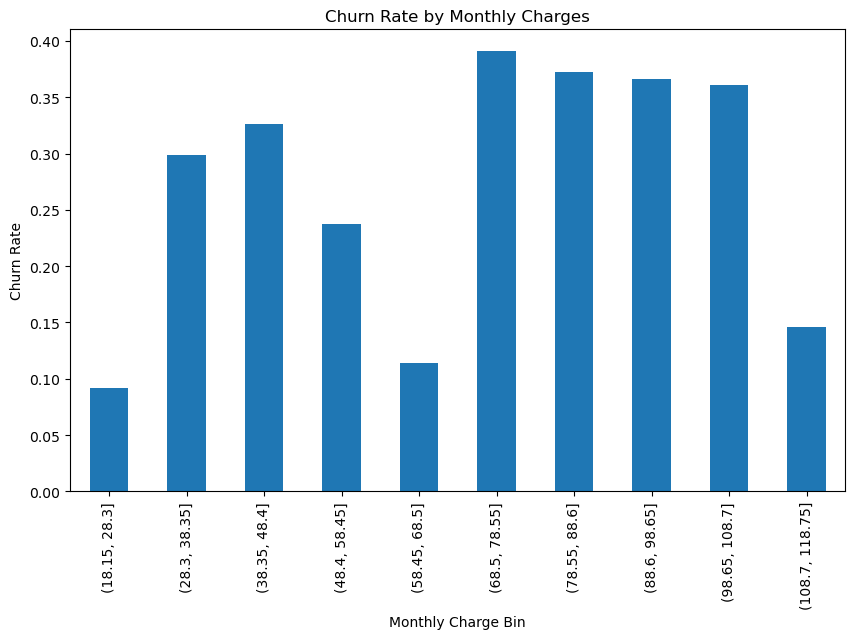

In [40]:
# EDA - Bivariate - Monthly charges vs churn rate 

# Bin monthly charges,  # Assumes 1=churned, 0=not
bins = pd.cut(df['Monthly Charges'], bins=10)
churn_rate = df.groupby(bins)['Churn Value'].mean()  

# Plot churn rate by monthly charge bin
plt.figure(figsize=(10, 6))
churn_rate.plot(kind='bar')
plt.title('Churn Rate by Monthly Charges')
plt.xlabel('Monthly Charge Bin')
plt.ylabel('Churn Rate')
plt.show()



The chart illustrates a distinct inverted U-shaped pattern, where customer retention is strongest at both the lowest ($18–$28) and highest ($108–$118) pricing tiers, with churn rates of 9% and 15% respectively. In contrast, the mid-tier pricing range ($68–$98) shows the highest churn risk, peaking at 39%, likely due to unmet expectations, perceived lack of value, and competitive alternatives. Low-paying customers tend to be more loyal, possibly due to lower expectations and reduced motivation to switch, while premium customers benefit from better service and higher switching costs. These insights suggest that churn is not linearly tied to price, and companies should revise their mid-tier offerings, preserve low-end value, and apply successful premium retention strategies across other segments.

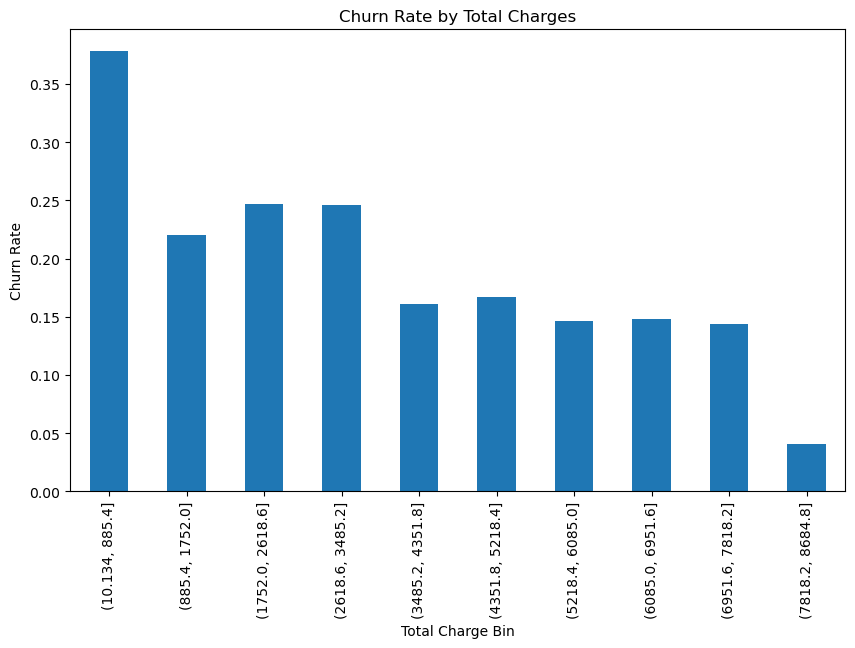

In [41]:
 #EDA - Bivariate - Total charges vs churn rate 

# Bin monthly charges
bins = pd.cut(df['Total Charges'], bins=10)
churn_rate = df.groupby(bins)['Churn Value'].mean()  # Assumes 1=churned, 0=not

# Plot churn rate by monthly charges bin
plt.figure(figsize=(10, 6))
churn_rate.plot(kind='bar')
plt.title('Churn Rate by Total Charges')
plt.xlabel('Total Charge Bin')
plt.ylabel('Churn Rate')
plt.show()


The chart reveals a clear inverse relationship between customer spending and churn likelihood. Customers with the lowest total charges between approximately $10 and $885, exhibit the highest churn rate, exceeding 35%, indicating that low spenders are more prone to cancel their service. As total charges increase, churn rates generally decline, stabilizing around 14–17% for mid-range spenders and dropping below 5% for the highest spenders. This pattern suggests that higher spending correlates with greater customer loyalty, offering valuable insight for businesses aiming to reduce churn by encouraging increased engagement or spending among low-charge customers.

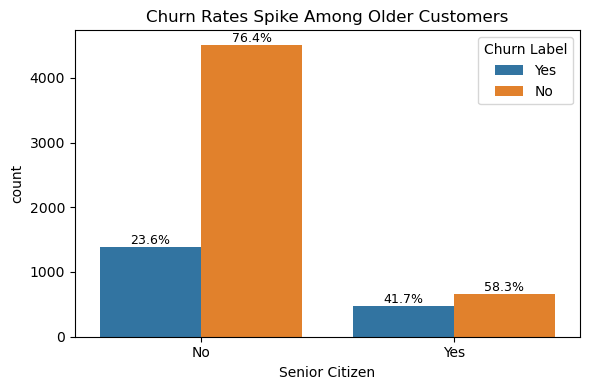

In [42]:
# EDA - Bivariate -Senior Citizen vs Churn Value 

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Senior Citizen', hue='Churn Label', data=df)
plt.title('Churn Rates Spike Among Older Customers')

# Add percentage annotations
# Get total counts per 'Senior Citizen' category
total_counts = df['Senior Citizen'].value_counts().to_dict()

# Annotate each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        label = bar.get_x() + bar.get_width() / 2
        category = bar.get_label()
        
        # Get the x-axis label (Senior Citizen: Yes or No)
        x_val = bar.get_x() + bar.get_width() / 2
        x_tick_index = int(round(x_val))
        if x_tick_index < len(ax.get_xticks()):
            senior_label = ax.get_xticklabels()[x_tick_index].get_text()
            total = total_counts.get(senior_label, 0)
            percent = height / total * 100 if total > 0 else 0

            ax.text(
                x_val,
                height,
                f'{percent:.1f}%',
                ha='center',
                va='bottom',
                fontsize=9
            )

plt.tight_layout()
plt.show()

Senior citizens exhibit a significantly higher churn rate compared to non-senior customers. The most striking insight is the sharp contrast between the two groups: 41.7% of senior citizens have churned, whereas only 23.6% of non-senior citizens have done so.

Non-senior citizens make up the majority of the customer base. This is clearly reflected in the visual representation, where the bars for the 'No' group on the x-axis are noticeably taller than those for the 'Yes' group. The data suggests that senior citizen status is linked to an elevated risk of churn. In fact, the churn rate among senior citizens is nearly double that of their non-senior counterparts, indicating that age may be a meaningful predictor of customer attrition.

These patterns have important implications for retention strategies. Tailored interventions such as personalized outreach, targeted offers, or adjustments to service plans could help reduce churn among senior customers and improve overall customer longevity.

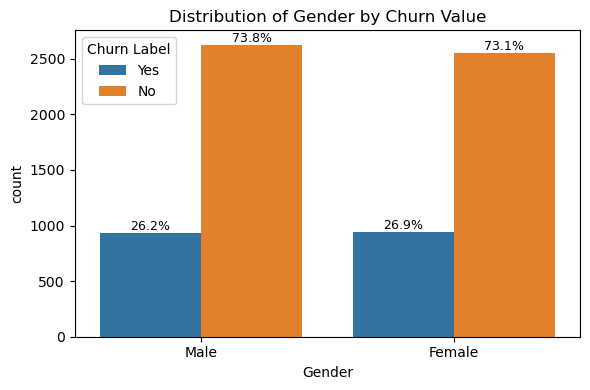

In [43]:
# EDA - Bivariate - Gender vs Churn Label


plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Gender', hue='Churn Label', data=df)
plt.title('Distribution of Gender by Churn Value')

# Add percentage annotations
# Get total counts per 'Gender' category
total_counts = df['Gender'].value_counts().to_dict()

# Annotate each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        label = bar.get_x() + bar.get_width() / 2
        category = bar.get_label()
        
        # Get the x-axis label (Gender: Yes or No)
        x_val = bar.get_x() + bar.get_width() / 2
        x_tick_index = int(round(x_val))
        if x_tick_index < len(ax.get_xticks()):
            senior_label = ax.get_xticklabels()[x_tick_index].get_text()
            total = total_counts.get(senior_label, 0)
            percent = height / total * 100 if total > 0 else 0

            ax.text(
                x_val,
                height,
                f'{percent:.1f}%',
                ha='center',
                va='bottom',
                fontsize=9
            )

plt.tight_layout()
plt.show()

Churn rates are nearly identical across genders. According to the chart, 26.2% of male customers have churned, compared to 26.9% of female customers. These closely aligned percentages indicate that gender is not a significant factor in predicting customer churn.

Additionally, the distribution of churned and non-churned customers is fairly balanced between males and females, suggesting an even gender representation within the overall customer base.

In summary, the likelihood of churn does not differ meaningfully between male and female customers. Therefore, gender should not be prioritized as a key variable in designing targeted retention strategies.

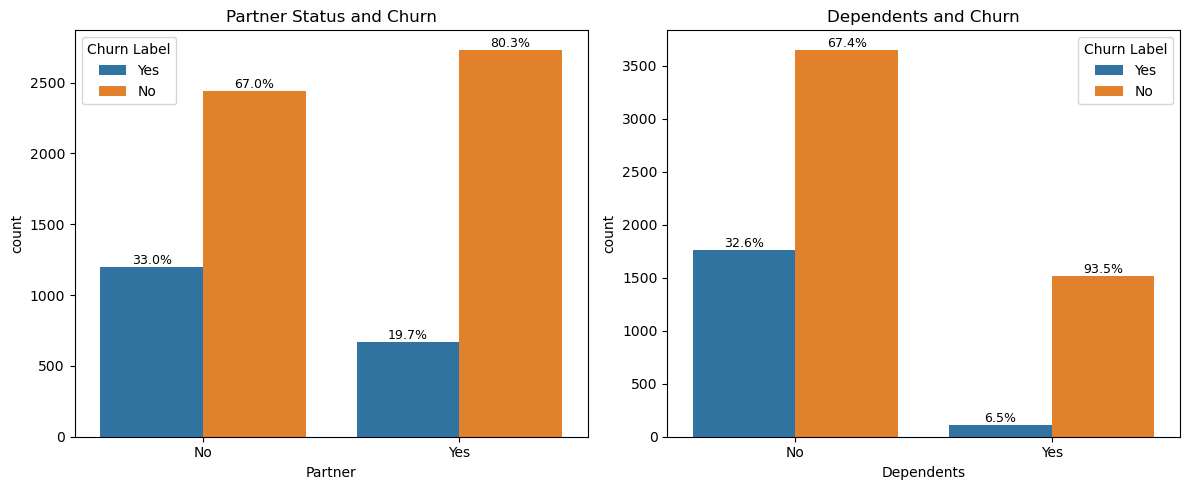

In [44]:
# EDA - Bivariate - Partner Status and Dependents vs Churn Label 


def annotate_percentages(ax, feature, hue):
    # Get total counts per category
    total_counts = df[feature].value_counts().to_dict()

    # Loop through each bar container
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2

            # Get the x-axis label ((partner:'Yes' or 'No')
            x_tick_index = int(round(x))
            if x_tick_index < len(ax.get_xticks()):
                label = ax.get_xticklabels()[x_tick_index].get_text()
                total = total_counts.get(label, 0)
                percent = height / total * 100 if total > 0 else 0

                ax.text(
                    x,
                    height,
                    f'{percent:.1f}%',
                    ha='center',
                    va='bottom',
                    fontsize=9
                )

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='Partner', hue='Churn Label', data=df, ax=axes[0])
axes[0].set_title('Partner Status and Churn')
annotate_percentages(axes[0], 'Partner', 'Churn Label')

sns.countplot(x='Dependents', hue='Churn Label', data=df, ax=axes[1])
axes[1].set_title('Dependents and Churn')
annotate_percentages(axes[1], 'Dependents', 'Churn Label')

plt.tight_layout()
plt.show()

Partner Status and Churn

Higher churn among customers without a partner, 33.0% of customers without a partner have churned, compared to just 19.7% of those with a partner.
Partnership linked to retention, 80.3% of partnered customers remain with the company, versus 67.0% of those without a partner.
Having a partner appears to be a stabilizing factor, potentially reflecting greater loyalty or life-stage stability that reduces the likelihood of churn.
    
Dependents and Churn

Significantly higher churn among customers without dependents, 32.6% of customers without dependents have churned, while only 6.5% of those with dependents have left.
Dependents strongly associated with retention, An impressive 93.5% of customers with dependents stayed, compared to 67.4% of those without.
Customers with dependents are far more likely to remain, possibly due to a greater need for consistent service to support their households.
    
Summary
  
Customers who have a partner and/or dependents are substantially less likely to churn. In contrast, those without either show significantly higher churn rates, suggesting that personal relationships and family responsibilities may play a key role in customer retention.

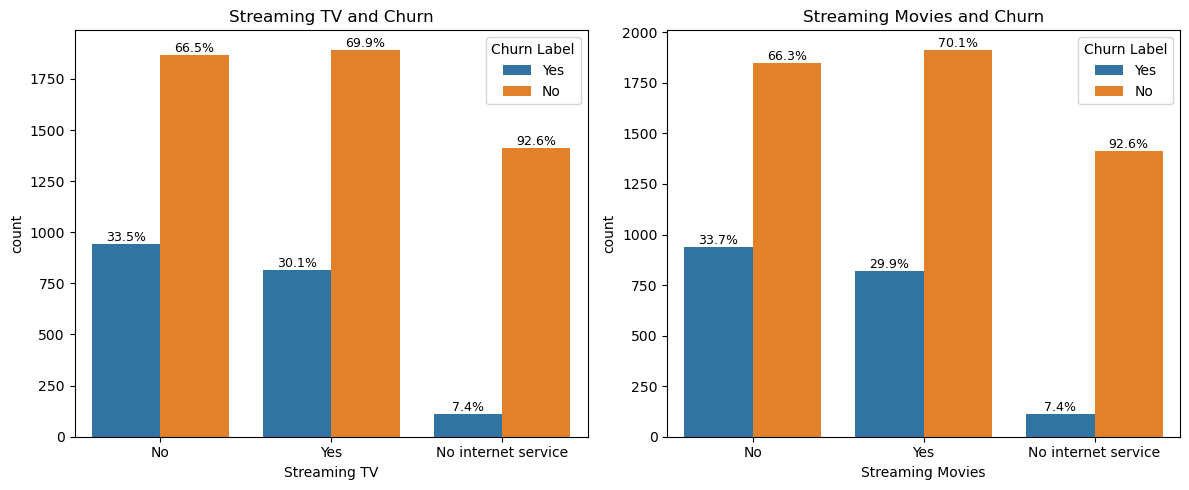

In [45]:
# EDA - Bivariate - Streaming TV and Streaming Movies vs Churn Label 

def streaming_col_percentages(ax, feature, hue):
    # Get total counts per feature category
    total_counts = df.groupby(feature).size().to_dict()

    # Annotate each bar
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2

            # Get the corresponding x-axis label
            for label in ax.get_xticklabels():
                if abs(label.get_position()[0] - x) < 0.5:
                    category = label.get_text()
                    break
            else:
                category = None

            if category and category in total_counts:
                total = total_counts[category]
                percent = height / total * 100 if total > 0 else 0

                ax.text(
                    x,
                    height,
                    f'{percent:.1f}%',
                    ha='center',
                    va='bottom',
                    fontsize=9
                )
                
                

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='Streaming TV', hue='Churn Label', data=df, ax=axes[0])
axes[0].set_title('Streaming TV and Churn')

sns.countplot(x='Streaming Movies', hue='Churn Label', data=df, ax=axes[1])
axes[1].set_title('Streaming Movies and Churn')

# Annotate with percentages
streaming_col_percentages(axes[0], 'Streaming TV', 'Churn Label')
streaming_col_percentages(axes[1], 'Streaming Movies', 'Churn Label')

plt.tight_layout()
plt.show()





Streaming TV

Minimal impact on churn, 30.1% of Streaming TV users have churned, compared to 33.5% of non-users. This indicates a slight association between Streaming TV usage and lower churn, though the effect is modest.
Lowest churn among customers without internet service, Only 7.4% of customers without any internet service have churned, suggesting this group may represent a smaller or less engaged segment with different usage patterns.
	
Streaming Movies

Churn trends similar to Streaming TV, 29.9% of Streaming Movies users have churned, versus 33.7% of non-users. Again, the presence of streaming services shows a slight reduction in churn, but not a significant one.
Consistently low churn among non-internet users, the same 7.4% churn rate applies, reinforcing this group as a distinct and more stable customer segment.
	
Summary

Streaming services (TV or Movies) are associated with a slightly lower churn rate, but the impact is not substantial.
Customers without internet service consistently show much lower churn, possibly due to reduced engagement or representing a unique customer profile.
Engagement with streaming services does not strongly predict retention, suggesting that other factors may play a more critical role in customer loyalty.

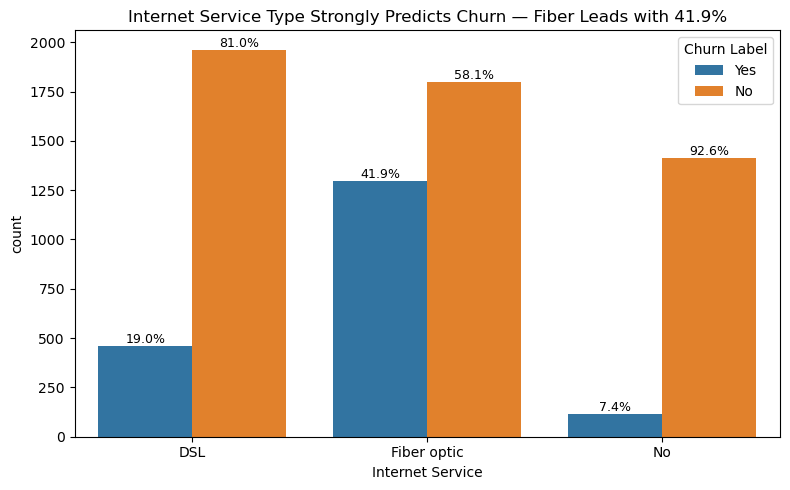

In [46]:
# EDA - Bivariate - Internet Service vs churn label

plt.figure(figsize=(8, 5))
ax = sns.countplot(x ='Internet Service', hue='Churn Label', data=df)
plt.title('Internet Service Type Strongly Predicts Churn — Fiber Leads with 41.9%')

# Get total counts per 'Internet Service'
total_counts = df.groupby('Internet Service').size().to_dict()

# Annotate each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2

        # Get the corresponding x-axis label
        label = ax.get_xticklabels()[int(round(x))].get_text()
        total = total_counts.get(label, 0)
        percent = height / total * 100 if total > 0 else 0

        ax.text(
            x,
            height,
            f'{percent:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.tight_layout()
plt.show()


Fiber Optic customers show the highest churn rate, at 41.9%, customers with Fiber Optic internet are the most likely to leave the company. This is a critical insight, especially given that this group represents a substantial portion of the customer base.
	
DSL customers exhibit moderate churn,  the churn rate among DSL users is 19.0%, significantly lower than that of Fiber Optic users, indicating a more stable segment.
	
Customers without internet service are the most loyal, With an exceptionally low churn rate of just 7.4%, this group appears to be highly stable. These customers likely rely on the company for non-internet services and demonstrate a strong tendency to stay.

Summary
 
The type of internet service a customer subscribes to is a strong predictor of churn behaviour. Fiber Optic users present the greatest retention challenge, while customers without internet service are the most stable. These findings highlight the need for targeted retention strategies, particularly for the high-risk Fiber Optic segment.

### EDA - Multivariate Analysis

In [47]:
#EDA - Multivariate - 

In [48]:
# EDA - Multivariate - Categorical columns

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    phi2 = chi2 / n
    # Bias correction
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


categorical_columns = [ 'City', 'Lat Long',  'Gender',  'Senior Citizen',  'Partner',  'Dependents',  'Phone Service',  
        'Multiple Lines',  'Internet Service',  'Online Security', 'Online Backup',  'Device Protection',  'Tech Support',
        'Streaming TV',  'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'
]


cramers_results = {}

for col in categorical_columns:
    v = cramers_v(df[col], df['Churn Label'])
    cramers_results[col] = round(v, 3)

# Convert to DataFrame for easy viewing
cramers_df = pd.DataFrame.from_dict(cramers_results, orient='index', columns=['Cramér\'s V'])
cramers_df = cramers_df.sort_values(by="Cramér's V", ascending=False)

print(cramers_df)

                   Cramér's V
Contract                0.410
Online Security         0.347
Tech Support            0.343
Internet Service        0.322
Payment Method          0.303
Online Backup           0.292
Device Protection       0.281
Dependents              0.248
Streaming TV            0.230
Streaming Movies        0.230
Paperless Billing       0.191
Partner                 0.150
Senior Citizen          0.150
City                    0.122
Lat Long                0.116
Multiple Lines          0.036
Phone Service           0.000
Gender                  0.000



Key Predictors of Customer Churn

Strongest Predictors

    • Contract Type (0.410):
The most influential factor. Contract length or structure (e.g., month-to-month vs. annual) is strongly tied to churn risk.

	• Online Security (0.347) & Tech Support (0.343):
Highly correlated with churn. Their availability and quality likely impact customer satisfaction and retention.

	• Internet Service (0.322):
The type or presence of internet service plays a major role, reinforcing earlier visual insights.

	• Payment Method (0.303), Online Backup (0.292), Device Protection (0.281):
These features show substantial influence, suggesting that billing preferences and value-added services affect churn behaviour.

 Moderately Influential Features
	• Demographics & Lifestyle:
    
		○ Dependents (0.248)
		○ Streaming TV (0.230) / Streaming Movies (0.230)
		○ Paperless Billing (0.191)
		○ Partner (0.150)
		○ Senior Citizen (0.150)
        
These variables offer moderate predictive value, useful for customer segmentation.
	• Geographic Factors:
    
		○ City (0.122)
		○ Location-based data (0.116)
Regional differences have some impact, though less than service-related features.
 
 Weak or Non-Predictive Features:
 
	• Multiple Lines (0.036), Phone Service (0.000), Gender (0.000):
These features show negligible correlation with churn and are unlikely to enhance predictive models.

 Summary 
 
Top predictors of churn are contract terms, internet service type, and value-added services like security and support.
Moderate predictors include demographic traits and entertainment options, which may aid in customer profiling.Minimal impact is observed from gender, phone service, and multiple lines—these can likely be excluded from churn models.
Customer churn is primarily driven by service experience and contract structure. Demographics play a secondary role, while some features have little to no predictive value.

                 Count  Zip Code  Latitude  Longitude  Tenure Months  \
Count              NaN       NaN       NaN        NaN            NaN   
Zip Code           NaN  1.000000  0.895743  -0.784271       0.001041   
Latitude           NaN  0.895743  1.000000  -0.876779      -0.001631   
Longitude          NaN -0.784271 -0.876779   1.000000      -0.001678   
Tenure Months      NaN  0.001041 -0.001631  -0.001678       1.000000   
Monthly Charges    NaN -0.004596 -0.019899   0.024098       0.247900   
Total Charges      NaN -0.001462 -0.010313   0.009047       0.825880   
Churn Value        NaN  0.003346 -0.003384   0.004594      -0.352229   
Churn Score        NaN -0.002769 -0.007684   0.004260      -0.224987   
CLTV               NaN -0.003562  0.000886   0.000485       0.396406   

                 Monthly Charges  Total Charges  Churn Value  Churn Score  \
Count                        NaN            NaN          NaN          NaN   
Zip Code               -0.004596      -0.001462     0

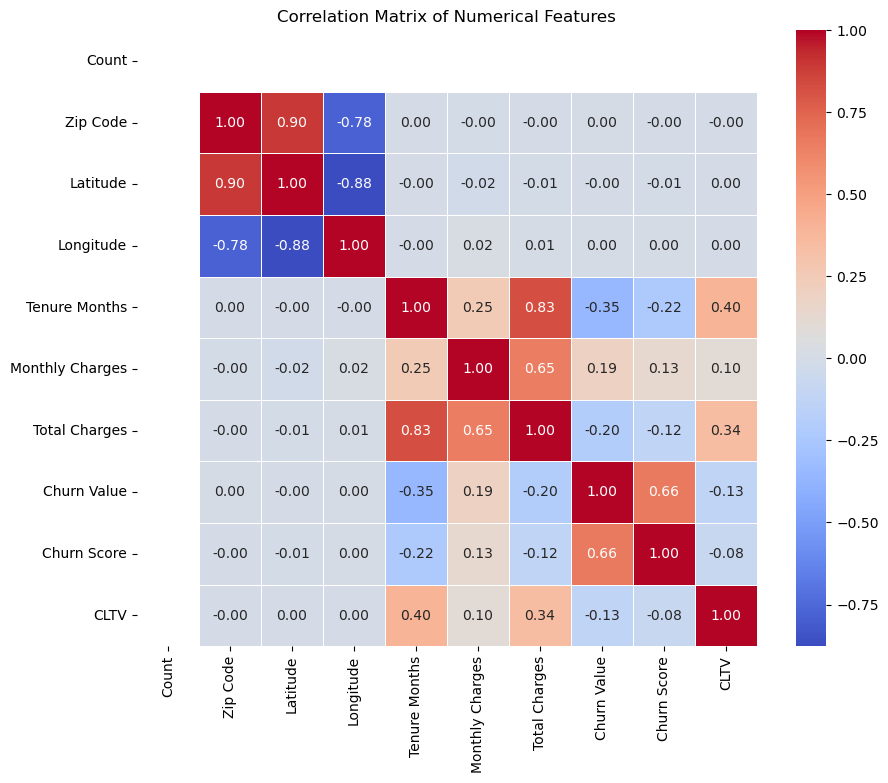

In [49]:
# EDA - Multivariate - Numerical columns

numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr(method='pearson')

# Display the matrix
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


 Predictors of Customer Churn
 
Strongest Predictor

	• Churn Score (0.66): This feature shows a strong positive correlation with the actual churn value, which is expected. The "Churn Score" is a pre-calculated metric derived from a predictive model, and its high correlation confirms the model’s effectiveness in identifying customers likely to churn.
    
Moderate to Weak Predictors

	• Monthly Charges (0.19): Exhibits a weak positive correlation. Customers with higher monthly charges show a slightly increased likelihood of churning.
    
	• Customer Lifetime Value (CLTV) (-0.13): Displays a weak negative correlation, suggesting that customers with higher predicted lifetime value are marginally less likely to churn.
    
	• Total Charges (-0.20): Indicates a moderate negative correlation. Suggests that customers who’ve paid more over time are less likely to churn. However, this contradicts earlier box plot findings, which showed churned customers had lower total charges. This discrepancy likely stems from tenure effects, as longer-tenured customers naturally accumulate more charges.
    
	• Tenure Months (-0.35): Shows a strong negative correlation.  Longer-tenured customers are significantly less likely to churn, a classic loyalty indicator.
	
Negligible Predictors
    
	• Geographical Data (Zip Code, Latitude, Longitude): These features have correlation scores of 0.00, indicating no meaningful relationship between a customer’s location and their churn status.
    
Additional Predictors
    
	•  Tenure vs. Total Charges (0.83): A very strong positive correlation between these two features confirms that Total Charges is heavily influenced by tenure, which explains the conflicting signals in churn prediction.
    
	• Monthly Charges vs. Total Charges (0.65):
Customers with higher monthly charges also tend to have higher total charges, reinforcing the need to disentangle these variables when modelling churn.


## <font color= darkred> EDA Summary</font>

Country & State:
All customers are based in California, United States, as indicated by the single distinct location value in the dataset.

City:

Customer churn appears exceptionally high nearing 100% across nearly top 20 cities, regardless of size or location, suggesting systemic issues beyond geography. Although city shows only a weak correlation with churn (0.122), smaller or rural areas like Smith River and Chaffee may be especially vulnerable, potentially due to limited service options or seasonal population shifts. Meanwhile, urban centres such as Los Angeles, San Diego, and San Jose hold the majority of customers and should be prioritized for retention and upsell efforts. To reduce churn, businesses should focus on geo-targeted campaigns, investigate broader service challenges, and tailor outreach strategies to both high-density and underserved regions.

Zip Code: 

Customer churn appears to be influenced by neighbourhood-level factors rather than broad regional trends or zip code alone, as evidenced by the dramatic variation in churn rates across zip codes within the Los Angeles area ranging from 20% to a staggering 100% in zip code 90020. Customers in areas like 90020, 90005, and 90010 are more likely to churn, potentially due to service issues, demographic mismatches, or intense local competition. Although zip code shows no statistical correlation with churn, the geographic clustering of high churn suggests that qualitative factors such as customer experience and local market dynamics play a critical role. To reduce churn, companies should implement targeted interventions in high-risk zones, enhance service quality, and tailor offers based on localized insights, while leveraging regional bundling and location-based promotions to strengthen customer retention.

Latitude & Longitude & Lat Long: 

Customer distribution across both latitude and longitude is relatively uniform, with most geographic coordinates showing 4–5 customers and no dominant clusters. This indicates a broad geographic spread both north-south and east-west, suggesting that location-based strategies should prioritize wide coverage rather than focusing on specific hotspots. A few coordinates show zero customer presence, pointing to potentially underserved or untapped areas worth exploring for future outreach or expansion. While individual latitude and longitude values show no correlation with churn (score: 0.00), the combined Lat-Long variable shows a weak positive correlation (0.116), hinting that geographic location may have a subtle influence on customer retention when considered holistically.


Gender:

Gender is not a contributing variable to customer churn, as both male and female customers exhibit nearly identical churn rates 26.2% and 26.9% respectively and show a correlation score of 0.000 with churn. This indicates that customers are equally likely to leave regardless of gender, and gender-based targeting is unlikely to improve retention outcomes. Therefore, retention strategies should not prioritize gender as a key factor. However, exploring gender-based service preferences could still offer value in crafting personalized experiences or marketing campaigns that enhance engagement, even if they don’t directly impact churn.

Senior Citizen:

Customer churn is notably influenced by age, with senior citizens (65+) showing a significantly higher churn rate of 41.7%, nearly double that of non-seniors at 23.6%. This makes age a meaningful predictor of attrition, supported by a moderate correlation score of 0.150. Seniors, though a minority in the customer base, are more likely to leave due to potential challenges with digital interfaces or unmet support needs. To reduce churn, companies should implement targeted retention strategies such as personalized outreach, simplified user experiences, enhanced tech support, and bundled service offerings tailored to senior customers. Meanwhile, product design and marketing should continue to cater to the tech-savvy majority while remaining inclusive.

Partner:

Customer churn is moderately influenced by partnership status, with single customers (52% of the base) showing a significantly higher churn rate of 33.0% compared to 19.7% among partnered individuals. This suggests that having a partner may contribute to customer retention, potentially due to shared service usage or greater life-stage stability. Partnership status, with a correlation of 0.150 to churn, emerges as a meaningful variable in predicting attrition. To mitigate churn, companies should consider personalized engagement strategies for single customers emphasizing independence and customization while offering bundled plans and convenience-driven messaging to partnered users. This dual-path approach can strengthen loyalty across both segments.

Dependents:

Customer churn is significantly influenced by whether a customer has dependents, with dependent status showing a strong correlation of 0.248 to churn. Customers without dependents who make up 77% of the base are far more likely to leave, with a churn rate of 32.6%, compared to just 6.5% among those with dependents. This suggests that customers with family responsibilities are more loyal, likely due to their need for stable and comprehensive service. To reduce churn, companies should offer family-oriented bundles and multi-line plans for those with dependents, while engaging single or child-free customers with personalized offers, loyalty incentives, and messaging that emphasizes flexibility and individual value.

Tenure Months :

The Tenure Months data reveals a diverse customer base ranging from new users to those with up to six years of service, showing a bimodal and slightly right-skewed distribution. Peaks at 1 month and 72 months highlight two key segments: short-term newcomers and loyal long-term users. However, a steep drop-off after the first month indicates poor early retention, with most churn occurring within the first 1–3 months. Customers who remain beyond 10–15 months are significantly less likely to churn, underscoring the importance of early engagement. To improve retention, businesses should focus on streamlined onboarding, proactive support, and targeted strategies during the critical initial months. Overall, tenure strongly correlates with customer loyalty, making it a vital metric for understanding churn behaviour.

Phone Service:

Phone service, while a core offering subscribed to by 90% of customers, does not contribute to customer churn, as evidenced by its zero correlation with attrition. Customers more likely to churn are not defined by their phone service status, suggesting that other variables such as age, partnership, or dependent status are more influential. To prevent churn, companies should shift their focus away from phone service and instead develop targeted retention strategies for niche segments like data-only or mobile-first users, offering personalized plans and experiences that better align with their unique needs.

Phone Service:

Phone service, while a core offering subscribed to by 90% of customers, does not contribute to customer churn, as evidenced by its zero correlation with attrition. Customers more likely to churn are not defined by their phone service status, suggesting that other variables such as age, partnership, or dependent status are more influential. To prevent churn, companies should shift their focus away from phone service and instead develop targeted retention strategies for niche segments like data-only or mobile-first users, offering personalized plans and experiences that better align with their unique needs.

Internet Service (Optic Fiber , DLS, No internet service):

Customer churn is strongly influenced by the type of internet service, with Fiber Optic emerging as both the most popular and the most unstable segment holding a 41.9% churn rate and a correlation of 0.322 with churn. These customers, who are likely tech-savvy and high-value, may be more sensitive to service quality and competitive offerings, making them the most likely to leave. DSL users show moderate churn at 19.0%, while customers without internet service are the most loyal, with only 7.4% churn. To reduce churn, companies should focus on improving service quality and satisfaction for Fiber Optic users, explore the motivations of non-internet users to convert them into subscribers, and promote DSL as a reliable alternative for retention.

Online security:

Online security emerges as a key variable contributing to customer churn, with a correlation score of 0.347, indicating that customers who do not subscribe to this add-on are more likely to leave. The most at-risk group includes the 50% of internet users who actively decline online security, while the 29% who do subscribe appear more engaged and stable. To reduce churn, companies should focus on educating non-subscribers about the value of online security, bundling it with other services to enhance appeal, and using churn data to prioritize outreach to high-risk segments. With 63% of internet users currently unprotected, this represents a significant opportunity for upselling and retention.

Online Backup:

Online Backup is a moderately influential variable in customer churn, with a correlation of 0.292, indicating that customers who do not use this service are more likely to leave. The most vulnerable group includes the 50% of internet users who actively decline the add-on, while the 29% who subscribe appear more stable. With 71% of the total customer base not using Online Backup, there’s a significant opportunity to reduce churn through targeted upselling. Strategic actions such as bundling Online Backup with other services like security or device protection, and deploying personalized promotions, can help convert non-subscribers into loyal users and strengthen overall retention.

Device Protection:

Device Protection is a moderately influential variable in customer churn, with a correlation of 0.281, indicating that customers who do not subscribe to this service are more likely to leave. The most vulnerable group includes the 44% of internet users who actively decline the add-on, while only 34% of all customers currently use it. With 66% of the customer base unprotected, there is a significant opportunity to reduce churn through targeted upselling. To retain these at-risk customers, companies should promote the value of device protection through personalized education, bundle it with complementary services like online security or backup, and prioritize outreach to non-subscribers showing signs of churn.

Tech Support:

Tech Support is a significant variable contributing to customer churn, with a correlation of 0.343, indicating that customers who lack access to support are more likely to leave, especially when technical issues arise. The most at-risk group includes the 49% of internet users who actively decline Tech Support, while only 29% of all customers currently subscribe. With 71% of the customer base unprotected, there’s a clear opportunity to reduce churn through strategic actions such as educating users on the benefits of support, bundling it with complementary services, and prioritizing outreach to high-risk segments identified through churn indicators.

Streaming TV :

Customer churn appears to be modestly influenced by Streaming TV usage, with subscribers showing a slightly lower churn rate (30.1%) compared to non-subscribers (33.5%), though the correlation is weak (0.230). The most churn-prone group consists of customers who actively decline the Streaming TV add-on (40%), suggesting disengagement or unmet needs. In contrast, customers without internet service 22% of the base exhibit the lowest churn (7.4%), likely due to lower engagement or unique usage patterns. To reduce churn, targeted actions could include bundling Streaming TV with other services, offering personalized recommendations to increase perceived value, and segmenting outreach strategies to better address the preferences of high-risk groups.


Streaming Movies:

Customer churn in relation to Streaming Movies appears to be influenced by engagement levels, with non-users showing a slightly higher churn rate (33.7%) than subscribers (29.9%), though the correlation is weak (0.230), indicating that streaming usage is not a strong predictor of loyalty. The most churn-prone group includes customers who actively decline the Streaming Movies add-on (40%), suggesting potential dissatisfaction or lack of perceived value. In contrast, customers without internet service 22% of the base—exhibit the lowest churn (7.4%), likely due to lower engagement or unique usage patterns. To reduce churn, companies should consider bundling Streaming Movies with other offerings, tailoring promotions to disengaged internet users, and exploring the motivations of the stable non-internet segment to uncover upselling opportunities.![image-8.png]

Contract ( Month-to-month, One year,  Two year):

Contract type is a key variable contributing to customer churn, with month-to-month subscribers who make up 55% of the customer base showing the highest churn rate at 42.7%. These customers are more likely to leave due to their preference for flexibility and lower commitment, making them the most at-risk group. In contrast, churn drops significantly among those on longer-term contracts, with just 11.3% for one-year and 2.8% for two-year plans, indicating that longer commitments foster greater loyalty. To reduce churn, businesses should target month-to-month users with personalized incentives such as discounts or premium features to encourage upgrades, while also reinforcing the value proposition for existing one-year customers to further improve retention.

Paperless Billing:

Paperless billing shows only a weak correlation with customer churn (0.191), indicating it is not a major driver of retention, though it does offer useful clues for segmentation. Customers who opt out of paperless billing 41% of the base may be less digitally engaged and more likely to resist change, making them a potentially higher-risk group. These individuals could represent older or more traditional demographics, requiring tailored communication strategies. To reduce churn, companies should promote the benefits of paperless billing, such as convenience and speed, while offering hybrid or incentive-based solutions to ease the transition. Meanwhile, digitally engaged users present opportunities for upselling and loyalty programs due to their openness to new services.

Payment Method ( Electronic check , Mailed check , Bank transfer (automatic), Credit card (automatic)):

Payment method is a moderately strong variable contributing to customer churn, with a correlation of 0.303. Customers who rely on manual payment methods such as electronic checks (34%) and mailed checks (23%) are more likely to churn, possibly due to the added effort or lack of automation. In contrast, those using automatic bank transfers or credit card payments (each at 22%) tend to be more stable. To reduce churn, businesses should encourage adoption of automatic payment options through targeted incentives like discounts or loyalty perks, while also streamlining manual payment processes to reduce friction. Segmenting customers by payment method can help tailor communication and offers that align with their preferences and improve retention.

Monthly Charges:

Monthly Charges range from €18.25 to €118.75, with a median of €70.35, reflecting distinct customer tiers. Most fall into lower-cost brackets, but many are mid-to-high spenders, suggesting upselling potential. Peaks at €18–30, €70–80, and €100+ highlight varied plan preferences. Churn is lowest at the pricing extremes and highest in the mid-tier, likely due to unmet expectations. This shows pricing alone doesn’t drive loyalty, and mid-tier offerings should be improved. A strong correlation (0.65) between monthly and total charges underscores the need for careful churn modelling.

Total Charges:

Total Charges, representing cumulative customer spending, range from €18.80 to €8,684.80 and show a highly right-skewed distribution, with most customers below €2,000. The median is €1,397.48, and the top quartile exceeds €2,283, reflecting a strong link between tenure and spending. Long-term customers contribute significantly more revenue, highlighting the importance of retention. The data’s wide variability suggests opportunities for customer segmentation based on spending levels.
Churn analysis reveals an inverse relationship between spending and churn: customers with low total charges (under €885) have the highest churn rates (plus 35%), while high spenders show strong loyalty, with churn dropping below 5%. This indicates that encouraging early engagement and spending can improve retention. A moderate negative correlation (-0.20) between total charges and churn further supports this insight.

Churn Label / Churn value (Target variable):

Churn Label:
Only 26% of customers have churned, while 73% remain loyal to the company. This means approximately 1 in 4 customers have left, indicating a moderately high churn rate that warrants immediate attention.

Churn Value:
The churn value is the numerical binary representation of the churn label, conveying the same information: 26% of customers have churned, while 73% have remained loyal to the company.

Churn Score:

The Churn Score, ranging from 0 to 100, predicts the likelihood of customer attrition. Half of the customers have churn scores above 61, indicating a substantial portion are at elevated risk. Additionally, 25% of customers score above 75, representing the highest-risk segment. A large concentration of scores falls between 60–80, highlighting a moderate to high-risk zone. The distribution is multimodal and slightly left-skewed, with three distinct peaks (20–40, 45–60, and 65–80), indicating varied churn risk profiles across customer segments. A score above 61 marks the higher-risk half of the customer base, emphasizing the need for targeted retention strategies. The Churn Score shows a strong positive correlation (0.66) with actual churn behaviour, confirming the predictive model’s effectiveness in identifying customers likely to churn.


 Customer Lifetime Value (CLTV):
 
CLTV which estimates future revenue potential, ranges from €2,003.00 to €6,500.00, with a median of €4,527.00.Customers with mid-range CLTV values (€4,000–€6,000) show notable churn rates, indicating that churn isn’t limited to low-value segments. Since CLTV has only a weak negative correlation with churn, other factors may be at play, though they weren’t identified in this analysis. To reduce churn, businesses should segment customers by CLTV, monitor mid-tier and high-value groups closely, and tailor retention efforts across all value tiers to protect long-term revenue.

Churn Reason:

Customer churn is influenced by several key variables, with poor customer service particularly the attitude of support personnel emerging as the most frequently cited reason among those who left. However, this insight is constrained by missing data from 73% of customers who remained, limiting its generalizability. Customers most likely to churn are those exposed to competitive pressure, such as better offers, faster download speeds, and more data from rivals, as well as those dissatisfied with service quality, pricing, and limited self-service options. To prevent further attrition, companies should prioritize staff training, enhance technical reliability, streamline pricing structures, and actively monitor competitor strategies while expanding user-friendly self-service tools.


In [50]:
# shows actual column namaes
print(df.columns.tolist())

['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


# <font color= darkred> Pre-porecessing</font>

In [51]:
# remove irrelevant columns 
df = df.drop(['CustomerID', 'Count', 'Country', 'State', 'City','Lat Long', 'Latitude', 'Longitude','Churn Label','Churn Score', 'CLTV','Churn Reason'], axis =1)

In [52]:
# Binary encoding 

binary_map = {
    'Yes': 1, 'No': 0,
    'yes': 1, 'no': 0,
    True: 1, False: 0,
    'Female': 1, 'Male': 0
}

binary_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
for col in binary_columns:
    df[col] = df[col].replace(binary_map)

In [53]:
#Convert multi-categorical data to numerical data 

multi_cat_cols_with_3 = [
    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Payment Method'
]

for col in multi_cat_cols_with_3:
    if col in df.columns:
        dummies = pd.get_dummies(df[col], prefix=col.replace(" ", "_"), prefix_sep='_', drop_first=True).astype(int)
        df = pd.concat([df.drop(columns=[col]), dummies], axis=1)



### Train-Test Split

In [54]:
X = df.drop(columns = 'Churn Value')
y = df['Churn Value']

#### Train-test split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =42, stratify = y)

In [56]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(4930, 31)
(4930,)
(2113, 31)
(2113,)


In [57]:
# convert high cardinaliy zip colde column to numerical 

def hierarchical_target_encoding_cv(df, zip_col, target_col, n_folds=5, smoothing=10):
    """
    Hierarchical target encoding with cross-validation to prevent data leakage.
    Adjusted for integer ZIP code column with zero-padded 5-digit formatting.
    """
    from sklearn.model_selection import KFold

    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Convert integer ZIP codes to zero-padded strings of length 5
    df[zip_col] = df[zip_col].astype(str).str.zfill(5)

    # Initialize the encoded column
    df[f'{zip_col}_hierarchical_cv'] = 0.0
     # Extract ZIP3 which often represent a broader geographic region
    df['zip3'] = df[zip_col].str[:3] 

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(df)):
        train_fold = df.iloc[train_idx]

        global_mean = train_fold[target_col].mean()

        # ZIP5 level stats - full 5-digit ZIP
        zip5_stats = train_fold.groupby(zip_col)[target_col].agg(['count', 'mean']).reset_index()
        zip5_stats.columns = [zip_col, 'zip5_count', 'zip5_mean']

        # ZIP3 level stats
        zip3_stats = train_fold.groupby('zip3')[target_col].agg(['count', 'mean']).reset_index()
        zip3_stats.columns = ['zip3', 'zip3_count', 'zip3_mean']

        val_fold = df.iloc[val_idx][[zip_col, 'zip3']].copy()

        val_encoded = val_fold.merge(zip5_stats, on=zip_col, how='left')
        val_encoded = val_encoded.merge(zip3_stats, on='zip3', how='left')

        val_encoded = val_encoded.fillna(0)

        def hierarchical_smooth_cv(row):
            if row['zip5_count'] >= 30:
                return row['zip5_mean']
            elif row['zip3_count'] >= 10:
                zip5_mean = row['zip5_mean'] if row['zip5_count'] > 0 else global_mean
                return (row['zip5_count']*zip5_mean + smoothing*row['zip3_mean'])/(row['zip5_count'] + smoothing)
            else:
                zip5_mean = row['zip5_mean'] if row['zip5_count'] > 0 else global_mean
                return (row['zip5_count']*zip5_mean + smoothing*global_mean)/(row['zip5_count'] + smoothing)

        val_encoded['hierarchical_cv_encoded'] = val_encoded.apply(hierarchical_smooth_cv, axis=1)

        col_pos = df.columns.get_loc(f'{zip_col}_hierarchical_cv')
        df.iloc[val_idx, col_pos] = val_encoded['hierarchical_cv_encoded'].values


    return df



In [58]:
def apply_hierarchical_cv_encoding(X_train, X_test, y_train, zip_col='zip_code'):
    # Convert ZIP codes to zero-padded strings
    X_train = X_train.copy()
    X_test = X_test.copy()

    X_train[zip_col] = X_train[zip_col].astype(str).str.zfill(5)
    X_test[zip_col] = X_test[zip_col].astype(str).str.zfill(5)

    train_df = X_train.copy()
    train_df['target'] = y_train




    train_encoded = hierarchical_target_encoding_cv(train_df, zip_col, 'target')

    global_mean = train_df['target'].mean()

    train_df['zip3'] = train_df[zip_col].str[:3]

    zip5_final = train_df.groupby(zip_col)['target'].agg(['count', 'mean']).reset_index()
    zip3_final = train_df.groupby('zip3')['target'].agg(['count', 'mean']).reset_index()

    def encode_test_zip(zip_code, zip5_stats, zip3_stats, global_mean, smoothing=10):
        zip3 = zip_code[:3]

        zip5_info = zip5_stats[zip5_stats[zip_col] == zip_code]
        zip3_info = zip3_stats[zip3_stats['zip3'] == zip3]

        zip5_count = zip5_info['count'].values[0] if len(zip5_info) > 0 else 0
        zip5_mean = zip5_info['mean'].values[0] if len(zip5_info) > 0 else global_mean
        zip3_count = zip3_info['count'].values[0] if len(zip3_info) > 0 else 0
        zip3_mean = zip3_info['mean'].values[0] if len(zip3_info) > 0 else global_mean

        if zip5_count >= 30:
            return zip5_mean
        elif zip3_count >= 10:
            return (zip5_count * zip5_mean + smoothing * zip3_mean) / (zip5_count + smoothing)
        else:
            return (zip5_count * zip5_mean + smoothing * global_mean) / (zip5_count + smoothing)

    X_test_encoded = X_test.copy()
    X_test_encoded[f'{zip_col}_hierarchical_cv'] = X_test[zip_col].apply(
        lambda x: encode_test_zip(x, zip5_final, zip3_final, global_mean)
    )

    return train_encoded, X_test_encoded


In [59]:
X_train_encoded, X_test_encoded = apply_hierarchical_cv_encoding(X_train, X_test, y_train, zip_col='Zip Code')


In [60]:
# remove original zip code column and target colunm

X_train_encoded = X_train_encoded.drop(columns=['target', 'Zip Code', 'zip3'], errors='ignore')
X_test_encoded = X_test_encoded.drop(columns=['target', 'Zip Code'], errors='ignore')


In [61]:
# Impute missing values
X_train_encoded[ 'Total Charges'] = X_train_encoded[ 'Total Charges'].fillna(X_train_encoded[ 'Total Charges'].mean())
X_test_encoded[ 'Total Charges'] = X_test_encoded[ 'Total Charges'].fillna(X_train_encoded[ 'Total Charges'].mean())

# Scale numeric features

numeric_cols= ['Tenure Months', 'Monthly Charges', 'Total Charges']
scaler = StandardScaler()
X_train_encoded[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])
X_test_encoded[numeric_cols] = scaler.transform(X_test_encoded[numeric_cols])

In [62]:
# checking scalling 
X_train_encoded. agg(['std','mean'])

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Multiple_Lines_No phone service,Multiple_Lines_Yes,Internet_Service_Fiber optic,Internet_Service_No,Online_Security_No internet service,Online_Security_Yes,Online_Backup_No internet service,Online_Backup_Yes,Device_Protection_No internet service,Device_Protection_Yes,Tech_Support_No internet service,Tech_Support_Yes,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Zip Code_hierarchical_cv
std,0.500044,0.367619,0.499695,0.422440,1.000101e+00,0.300840,0.491458,1.000101e+00,1.000101e+00,0.300840,0.494136,0.496626,0.411992,0.411992,0.453177,0.411992,0.476666,0.411992,0.476794,0.411992,0.455783,0.411992,0.488622,0.411992,0.488176,0.407162,0.428208,0.411852,0.472212,0.419448,0.069801
mean,0.497363,0.161055,0.481136,0.232454,1.167423e-16,0.899391,0.592292,4.143632e-17,1.088154e-16,0.100609,0.423327,0.441582,0.216633,0.216633,0.288641,0.216633,0.348884,0.216633,0.349290,0.216633,0.294320,0.216633,0.393712,0.216633,0.391684,0.209736,0.241785,0.216430,0.335497,0.227789,0.265153


In [63]:
# checking imputation
X_train_encoded['Total Charges'].isnull().any()

False

In [64]:
# Preserve original preprocessed training and test sets
X_train_rf_xgb = X_train_encoded.copy()
y_train_rf_xgb = y_train.copy()
X_test_rf_xgb = X_test_encoded.copy()
y_test_rf_xgb = y_test.copy()

# Apply SMOTE only to training set for Logistic Regression
smote = SMOTE(random_state=42)
X_train_smote_array, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

# Convert SMOTE output back to DataFrame
X_train_smote = pd.DataFrame(X_train_smote_array, columns=X_train_encoded.columns)

In [65]:
# checking smote target variable
from collections import Counter
print(Counter(y_train_smote))

Counter({0: 3622, 1: 3622})


# <font color= darkred> Model building </font> 

In [66]:
# Dummy baseline - logistic regression with smote
dummy_smote = DummyClassifier(strategy='most_frequent')
dummy_smote.fit(X_train_smote, y_train_smote)

print("Dummy Accuracy (LR) Test:", dummy_smote.score(X_test_encoded, y_test))


Dummy Accuracy (LR) Test: 0.73450070989115


#### Logitic Regression 

In [67]:
# Define model
logistic_model = LogisticRegression(max_iter=1000, penalty='elasticnet', solver='saga', random_state=42)


# Define hyperparameter grid
logistic_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}


# cross-validation 
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV- training data
logistic_grid = GridSearchCV(logistic_model, logistic_param_grid, cv=cv_strategy, scoring='f1', n_jobs=-1)
logistic_grid.fit(X_train_smote, y_train_smote)

# Extract best model
best_logistic = logistic_grid.best_estimator_
print(" Best Logistic F1 Score (CV) Training:", logistic_grid.best_score_)

#Make predictions on test set
y_pred_logistic = best_logistic.predict(X_test_encoded)
y_proba_logistic = best_logistic.predict_proba(X_test_encoded)[:, 1]

# Evaluate performance- Test data 
print("Accuracy Test:", accuracy_score(y_test, y_pred_logistic))
print("F1 Score Test:", f1_score(y_test, y_pred_logistic))
print("AUROC Test:", roc_auc_score(y_test, y_proba_logistic))



 Best Logistic F1 Score (CV) Training: 0.827433612758534
Accuracy Test: 0.7595835305253195
F1 Score Test: 0.6180451127819548
AUROC Test: 0.8410813716301891


In [68]:
# checking indivual fold F1 scores
cv_results = logistic_grid.cv_results_['mean_test_score']
print("All CV F1 Scores:", cv_results)

All CV F1 Scores: [0.79667567 0.79080092 0.7893707  0.81070115 0.81021272 0.81089898
 0.82483472 0.82500926 0.82675894 0.82723935 0.82743361 0.82734582]


In [69]:
# Getting coefficients and odds ratios
coefficients = best_logistic.coef_[0]
odds_ratios = np.exp(coefficients)


feature_names = X_train_encoded.columns.tolist()
assert list(X_train_smote.columns) == list(X_train_encoded.columns)

# Create a DataFrame for easy viewing
summary_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

# Sort by absolute value of coefficient (optional)
summary_df['Abs(Coefficient)'] = summary_df['Coefficient'].abs()
summary_df = summary_df.sort_values(by='Abs(Coefficient)', ascending=False)

# Display the table
print(summary_df[['Feature', 'Coefficient', 'Odds Ratio']])

                                   Feature  Coefficient     Odds Ratio
7                          Monthly Charges    11.943157  153761.358170
11            Internet_Service_Fiber optic    -9.287539       0.000093
5                            Phone Service    -4.919103       0.007306
22                        Streaming_TV_Yes    -3.791832       0.022554
24                    Streaming_Movies_Yes    -3.714301       0.024372
9          Multiple_Lines_No phone service     3.557022      35.058643
14                     Online_Security_Yes    -2.701994       0.067072
20                        Tech_Support_Yes    -2.693027       0.067676
16                       Online_Backup_Yes    -2.358550       0.094557
18                   Device_Protection_Yes    -2.263851       0.103949
3                               Dependents    -2.112152       0.120977
10                      Multiple_Lines_Yes    -1.847319       0.157659
4                            Tenure Months    -1.731303       0.177054
26    

In [70]:
#Visualize Top 10 Positive Coefficients and odds ratios (Driving Churn)
# Define the data
data = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Feature": [
        "Monthly Charges",
        "Streaming_TV_Yes",
        "Streaming_Movies_Yes",
        "Zip_Code_hierarchical_cvr",
        "Payment_Method_Credit card (auto)",
        "Senior Citizen",
        "Payment_Method_Electronic check",
        "Gender",
        "Payment_Method_Mailed check",
        "Partner"
    ],
    "Coefficient": [
        11.475232,
        3.524000,
        3.523999,
        0.010993,
        0.010993,
        0.010993,
        0.010993,
        0.010993,
        0.010993,
        0.010993
    ],
    "Odds Ratio": [
        96308.87,
        33.999264,
        33.999204,
        1.011054,
        1.011054,
        1.011054,
        1.011054,
        1.011054,
        1.011054,
        1.010993
    ]
}

#DataFrame
Coefficients_df= pd.DataFrame(data)

print(Coefficients_df)

   Rank                            Feature  Coefficient    Odds Ratio
0     1                    Monthly Charges    11.475232  96308.870000
1     2                   Streaming_TV_Yes     3.524000     33.999264
2     3               Streaming_Movies_Yes     3.523999     33.999204
3     4          Zip_Code_hierarchical_cvr     0.010993      1.011054
4     5  Payment_Method_Credit card (auto)     0.010993      1.011054
5     6                     Senior Citizen     0.010993      1.011054
6     7    Payment_Method_Electronic check     0.010993      1.011054
7     8                             Gender     0.010993      1.011054
8     9        Payment_Method_Mailed check     0.010993      1.011054
9    10                            Partner     0.010993      1.010993


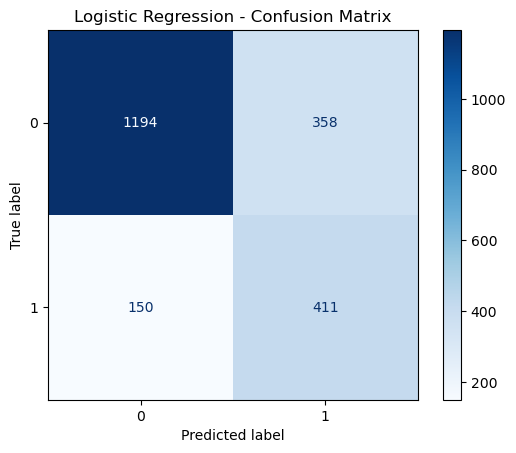

In [71]:
# Plot confusion matrix - Test data
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
ConfusionMatrixDisplay(confusion_matrix=cm_logistic).plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


True Negatives (TN) : 1194 - Correctly identified non-churners. No cost.

True Positives (TP)	: 411 - Correctly identified churners, opportunity to retain.

False Positives (FP) : 358 - Predicted churn but customer stayed, unnecessary retention cost.

False Negatives (FN) : 150 - Missed actual churners, lost revenue.



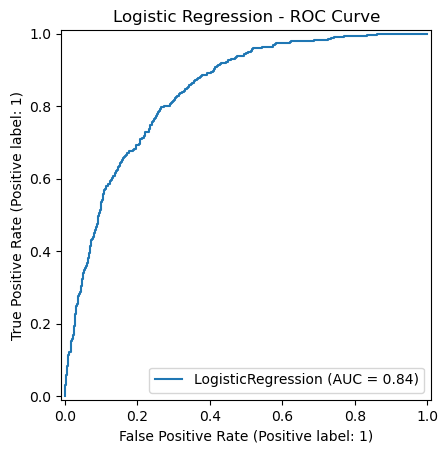

In [72]:
#Plot ROC curve - Test data
RocCurveDisplay.from_estimator(best_logistic, X_test_encoded, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.show()

AUC = 84% means the model is good at distinguishing between classes across all thresholds.



In [73]:
# Baseline Cost Calculation
# Confusion matrix
fp = 358
fn = 150

# Define costs
cost_fp = 100  # Cost of false positive
cost_fn = 150  # Cost of false negative

# Calculate total cost
total_cost = (fp * cost_fp) + (fn * cost_fn)

# Print results with actual values
print(f"False Positives: {fp} * ${cost_fp} = ${fp * cost_fp}")
print(f"False Negatives: {fn} * ${cost_fn} = ${fn * cost_fn}")
print(f"Total Misclassification Cost: ${total_cost}")


False Positives: 358 * $100 = $35800
False Negatives: 150 * $150 = $22500
Total Misclassification Cost: $58300


Logistic Regression Summary: 

CV Fold s F1 score :  Performance well across folds, No fold drastically underperforms, reliable cross-validation so the model generalizes well. 

Accuracy: ~76% overall accuracy, a decent result, outperforming the dummy classifier (73%). This indicates the model captures meaningful patterns beyond baseline predictions.


F1 Score drops from ~83% (CV) training  to ~62% (Test) , a notable decline. This may suggest slight overfitting or that the test set distribution differs from the training set, possibly due to class imbalance or sampling variation.


AUROC: 84% Strong score, the model is good at distinguishing between classes across all thresholds.
    
    
Top 5 features to contribute to churn : Monthly Charges, Streaming_Movies_Yes , Zip code,Payment_Method_Credit card (auto),    Senior Citizen.These features show the strongest influence on churn predictions, based on Coefficients and odds ratios. 
    

    Business Implications:
 
	• False positives (358): May lead to unnecessary retention efforts, with a total estimated cost of $35,800 (assuming $100 per customer).
    
    • False negatives (147): Risk of losing actual churners, with a potential revenue loss of $22,050 (assuming $150 per customer).
    
    • Total Misclassification Cost: €58,300, highlighting the financial impact of prediction errors and the value of improving model precision.

#### Random Forest

In [74]:
# Dummy for RF and XGBoost (trained on originalimbalanced data, no smote)
dummy_orig = DummyClassifier(strategy='most_frequent')
dummy_orig.fit(X_train_rf_xgb, y_train_rf_xgb)
print("Dummy Accuracy (rf, xgb)Test:", dummy_orig.score(X_test_encoded, y_test))



Dummy Accuracy (rf, xgb)Test: 0.73450070989115


In [75]:
# Define model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# cross-validation 
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=cv_strategy, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train_rf_xgb, y_train_rf_xgb)

# Extract best model
best_rf = rf_grid.best_estimator_
print(" Best Random Forest F1 Score (CV) Training:", rf_grid.best_score_)

assert list(X_train_encoded.columns) == list(X_train_rf_xgb.columns)
assert list(X_train_encoded.columns) == list(X_test_rf_xgb.columns)

# calibrate the model - re-trains the model using cross-validation to adjust the predicted probabilities using this method
calibrated_rf = CalibratedClassifierCV(best_rf, method='isotonic', cv=5)
calibrated_rf.fit(X_train_rf_xgb, y_train_rf_xgb)

# Make predictions on test set with calibrated probabilities
y_pred_rf = calibrated_rf.predict(X_test_rf_xgb)
y_proba_rf = calibrated_rf.predict_proba(X_test_rf_xgb)[:, 1]


# Evaluate performance
print("Accuracy Test:", accuracy_score(y_test_rf_xgb, y_pred_rf))
print("F1 Score Test:", f1_score(y_test_rf_xgb, y_pred_rf))
print("AUROC Test:", roc_auc_score(y_test_rf_xgb, y_proba_rf))






 Best Random Forest F1 Score (CV) Training: 0.5976132380783976
Accuracy Test: 0.7998106956933271
F1 Score Test: 0.5865102639296188
AUROC Test: 0.8510845645662201


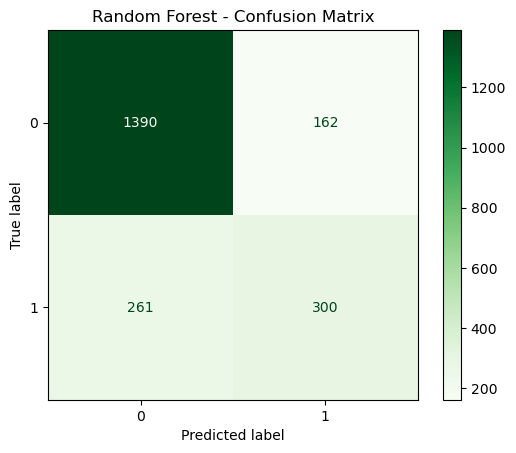

In [76]:
# Plot confusion matrix -Test data
cm_rf = confusion_matrix(y_test_rf_xgb, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot(cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.show()

True Negatives (TN) : 1390 - Correctly identified non-churners. No cost.

True Positives (TP)	: 300 - Correctly identified churners, opportunity to retain.

False Positives (FP) : 162 - Predicted churn but customer stayed, unnecessary retention cost.

False Negatives (FN) : 261 - Missed actual churners, lost revenue.


In [77]:
# Baseline Cost Calculation
# Confusion matrix
fp = 162
fn = 261

# Define costs
cost_fp = 100  # Cost of false positive
cost_fn = 150  # Cost of false negative

# Calculate total cost
total_cost = (fp * cost_fp) + (fn * cost_fn)

# Print results with actual values
print(f"False Positives: {fp} * ${cost_fp} = ${fp * cost_fp}")
print(f"False Negatives: {fn} * ${cost_fn} = ${fn * cost_fn}")
print(f"Total Misclassification Cost: ${total_cost}")


False Positives: 162 * $100 = $16200
False Negatives: 261 * $150 = $39150
Total Misclassification Cost: $55350


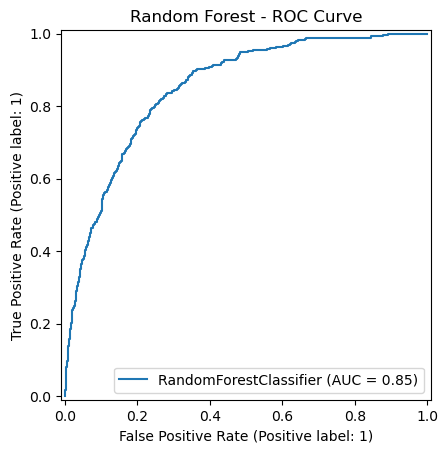

In [78]:
# Plot ROC curve - Test data
RocCurveDisplay.from_estimator(best_rf, X_test_rf_xgb, y_test_rf_xgb)
plt.title("Random Forest - ROC Curve")
plt.show()

AUROC: 85% Very good class separation, model distinguishes churners from non-churners well.

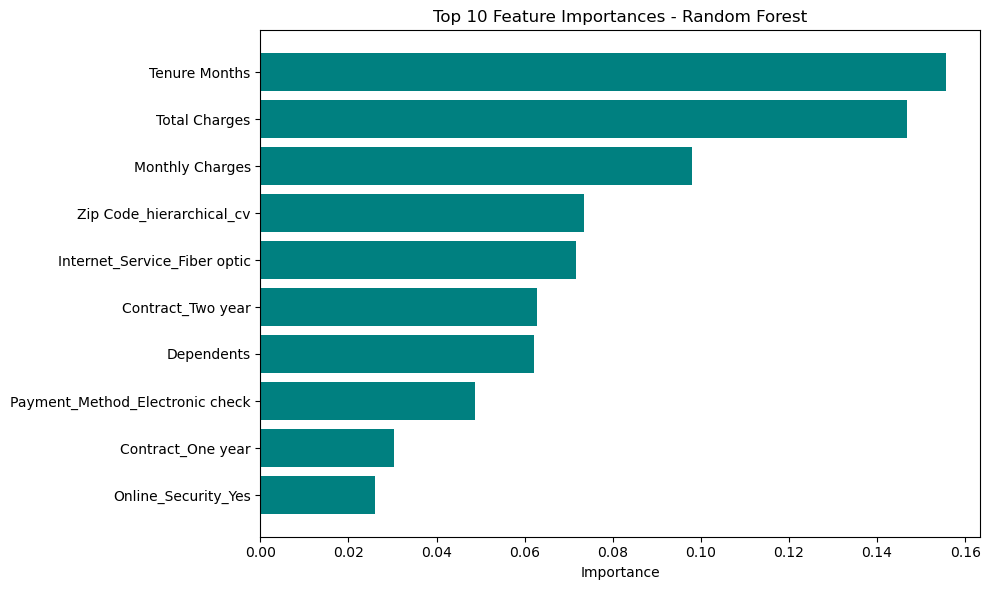

In [79]:

# Feature Importance
importances = best_rf.feature_importances_
feature_names = X_train_rf_xgb.columns if hasattr(X_train_rf_xgb, 'columns') else [f'Feature {i}' for i in range(X_train_rf_xgb.shape[1])]
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:10][::-1], feat_imp_df['Importance'][:10][::-1], color='teal')
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

Random Forest Summary: 

Accuracy: Appx 80% of predictions are correct overall. The Random Forest improves accuracy by approximately 6.53% over a naive baseline (majority class prediction at appx 73.45%) and 4% over the logistic regression model (appx 75.96%). This translates into hundreds of more accurate predictions and potentially thousands of dollars in savings.

F1 Score(CV) (training data): The model achieves an F1 score of ~60% during cross-validation, indicating a reasonable balance between precision and recall. The test F1 score is ~58.66%, only 1.4% lower than the training score, suggesting no significant overfitting and consistent generalization across unseen data.

AUROC: 85.1% Strong class separation, model distinguishes churners from non-churners well.
    
 Top 5 features to contribute to churn : Tenure Month, Total Charges, Monthly Charges, Zip code and Internet_service_fiber_optic. These features show the strongest influence on churn predictions, based on feature importance analysis.
    
    Business Implications:
 
	• False Positives (162): May trigger unnecessary retention efforts, costing an estimated €16,200 (assuming €100 per customer).
    
	• False Negatives (261): Represent missed opportunities to retain actual churners, with a potential revenue loss of €39,150 (assuming €150 per customer).
    
    • Total Misclassification Cost: €55,350, highlighting the financial impact of prediction errors and the value of improving model precision.


In [80]:
X_train_rf_xgb.columns[X_train_rf_xgb.columns.duplicated()]

Index([], dtype='object')

In [81]:
# ensures that all column names are unique
from collections import Counter

def make_column_names_unique(columns):
    counts = Counter()
    new_columns = []
    for col in columns:
        counts[col] += 1
        if counts[col] > 1:
            new_columns.append(f"{col}_{counts[col]}")
        else:
            new_columns.append(col)
    return new_columns

X_train_rf_xgb.columns = make_column_names_unique(X_train_rf_xgb.columns)

In [82]:

X_train_rf_xgb.columns 

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'Multiple_Lines_No phone service',
       'Multiple_Lines_Yes', 'Internet_Service_Fiber optic',
       'Internet_Service_No', 'Online_Security_No internet service',
       'Online_Security_Yes', 'Online_Backup_No internet service',
       'Online_Backup_Yes', 'Device_Protection_No internet service',
       'Device_Protection_Yes', 'Tech_Support_No internet service',
       'Tech_Support_Yes', 'Streaming_TV_No internet service',
       'Streaming_TV_Yes', 'Streaming_Movies_No internet service',
       'Streaming_Movies_Yes', 'Contract_One year', 'Contract_Two year',
       'Payment_Method_Credit card (automatic)',
       'Payment_Method_Electronic check', 'Payment_Method_Mailed check',
       'Zip Code_hierarchical_cv'],
      dtype='object')

#### XGBOOST

In [83]:

# Define model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define hyperparameter grid
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    
}

# cross-validation 
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=cv_strategy, scoring='f1', n_jobs=-1, verbose=0)
xgb_grid.fit(X_train_rf_xgb, y_train_rf_xgb)

# Extract best model
best_xgb = xgb_grid.best_estimator_
print("Best XGBoost F1 Score (CV) Training:", xgb_grid.best_score_)

# Make predictions on test set
y_pred_xgb = best_xgb.predict(X_test_rf_xgb)
y_proba_xgb = best_xgb.predict_proba(X_test_rf_xgb)[:, 1]

# Evaluate performance
print(" Accuracy Test:", accuracy_score(y_test_rf_xgb, y_pred_xgb))
print(" F1 Score Test:", f1_score(y_test_rf_xgb, y_pred_xgb))
print(" AUROC Test:", roc_auc_score(y_test_rf_xgb, y_proba_xgb))




Best XGBoost F1 Score (CV) Training: 0.6010390068343463
 Accuracy Test: 0.7979176526265973
 F1 Score Test: 0.585838991270611
 AUROC Test: 0.8553686118308618


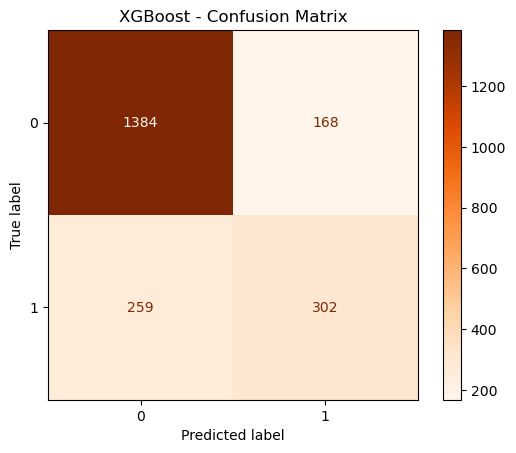

In [84]:
# Plot confusion matrix - Test data
cm_xgb = confusion_matrix(y_test_rf_xgb, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm_xgb).plot(cmap='Oranges')
plt.title("XGBoost - Confusion Matrix")
plt.show()

True Negatives (TN) : 1384 - Correctly identified non-churners. No cost.

True Positives (TP)	: 302 - Correctly identified churners, opportunity to retain.

False Positives (FP) : 186 - Predicted churn but customer stayed, unnecessary retention cost.

False Negatives (FN) : 259 - Missed actual churners, lost revenue.

In [85]:
# Baseline Cost Calculation
# Confusion matrix
fp = 186
fn = 259

# Define costs
cost_fp = 100  # Cost of false positive
cost_fn = 150  # Cost of false negative

# Calculate total cost
total_cost = (fp * cost_fp) + (fn * cost_fn)

# Print results with actual values
print(f"False Positives: {fp} * ${cost_fp} = ${fp * cost_fp}")
print(f"False Negatives: {fn} * ${cost_fn} = ${fn * cost_fn}")
print(f"Total Misclassification Cost: ${total_cost}")

False Positives: 186 * $100 = $18600
False Negatives: 259 * $150 = $38850
Total Misclassification Cost: $57450


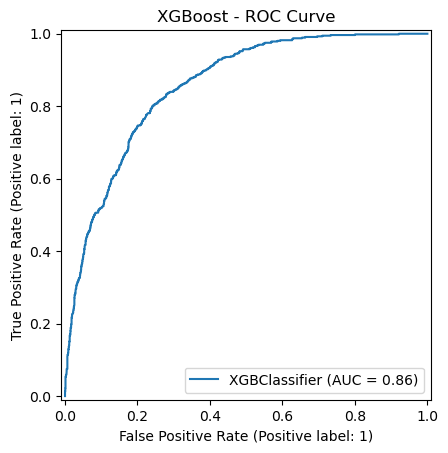

In [86]:
# Plot ROC curve- Test data
RocCurveDisplay.from_estimator(best_xgb, X_test_rf_xgb , y_test)
plt.title("XGBoost - ROC Curve")
plt.show()

AUROC: 85.53% Strong class separation, model distinguishes churners from non-churners well.

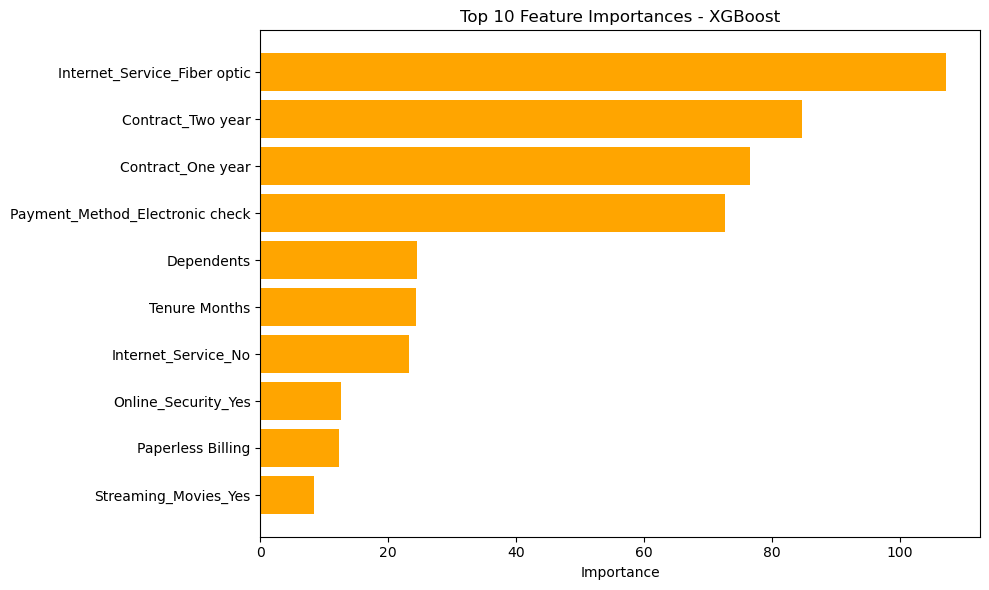

In [87]:
# Feature Importance - Test data

# Get feature importances
importance_type = 'gain'  
importances = best_xgb.get_booster().get_score(importance_type=importance_type)

# Convert to DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': list(importances.keys()),
    'Importance': list(importances.values())
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:10][::-1], feat_imp_df['Importance'][:10][::-1], color='orange')
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances - XGBoost")
plt.tight_layout()
plt.show()

XGBoost Summary: 

Accuracy: Appx 80% of predictions are correct overall.The XGBoost improves accuracy by approximately 6.53% over a naive baseline (majority class prediction at 73.45%), performs 0.21% is better than Random Forest(79.98%) and 4.24% better than Logistic regression(75.95%). This translates into more accurate predictions and meaningful cost savings.

F1 Score(CV) (training data): The model achieves an F1 score of 60.10% during cross-validation, indicating a solid balance between precision and recall. The test F1 score is 58.58%, only 1.52% lower than the training score, suggesting minimal overfitting and strong generalization to unseen data.


AUROC: 85.53% Strong class separation, model distinguishes churners from non-churners well.
    
 Top 5 features to contribute to churn :  Internet_service_fiber_optic, Contract_two_year, contract_one_year, payment_Method_Electronic_check, and Dependents. These features show the strongest influence on churn predictions, based on feature importance analysis.
 
    Business Implications:
 
    • False Positives (186): May lead to unnecessary retention efforts, costing an estimated €18,600 (assuming €100 per customer).

    • False Negatives (259): Represent missed opportunities to retain actual churners, with a potential revenue loss of €38,850 (assuming €150 per customer).

    • Total Misclassification Cost: €57,450, underscoring the financial impact of prediction errors and the importance of improving model precision.

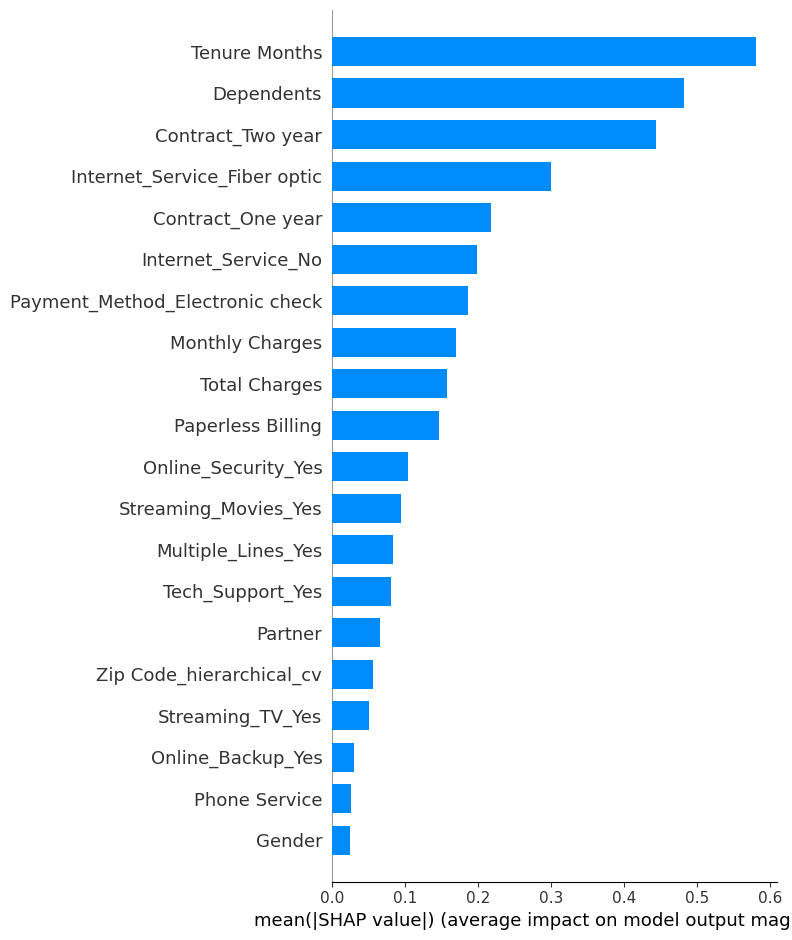

In [88]:
# SHAP 

# Initialize the TreeExplainer for your trained XGBoost model
explainer = shap.TreeExplainer(best_xgb)

# Use the same test set you used for evaluation
shap_values = explainer.shap_values(X_test_encoded)

# Summary plot shows overall impact of features
shap.summary_plot(shap_values, X_test_encoded, plot_type="bar")